# Walmart Sales Forecast

## Features data dictionary
This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

**Store:**
Store number

**Date:**
Week

**Temperature:**
Average temperature in the region

**Fuel_Price:**
Cost of fuel in the region

**MarkDown1:**
Anonymized data related to promotional markdowns that Walmart is running.

**MarkDown2:**
Anonymized data related to promotional markdowns that Walmart is running.

**MarkDown3:**
Anonymized data related to promotional markdowns that Walmart is running.

**MarkDown4:**
Anonymized data related to promotional markdowns that Walmart is running.

**MarkDown5:**
Anonymized data related to promotional markdowns that Walmart is running.

**CPI:**
The consumer price index

**Unemployment:**
The unemployment rate

**IsHoliday:**
Whether the week is a special holiday week

## Stores data dictionary
This file contains anonymized information about the 45 stores, indicating the type and size of the store:

**Store:**
Stores numbered from 1 to 45

**Type:**
Store type has been provided, there are 3 types — A, B and C.

**Size:**
Stores size has provided

## Train data dictionary
This is the historical training data, which covers 2010–02–05 to 2012–11–01. Within this file you will find the following fields:

**Store:**
The store number

**Dept:**
The department number

**Date:**
The week

**Weekly_Sales:**
Sales for the given department in the given store,

**IsHoliday:**
Whether the week is a special holiday week

## Test data dictionary
This file is identical to train.csv, except we have withheld the weekly sales.

**Store:**
The store number

**Dept:**
The department number

**Date:**
The week

**IsHoliday:**
Whether the week is a special holiday week

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import statsmodels.api as sm
from pylab import rcParams
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
init_notebook_mode(connected=True)
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# loading datasets
features_data = pd.read_csv('features.csv')

stores_data = pd.read_csv('stores.csv')

test_data = pd.read_csv('test.csv')

train_data = pd.read_csv('train.csv')

In [3]:
# merging datasets
df = train_data.merge(features_data, on = ['Store', 'Date'], how = 'inner').merge(stores_data, on = ['Store'], 
                                                                                    how = 'inner')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [4]:
print(f"This dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

This dataset contains 421570 rows and 17 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

## Data Preprocessing

In [6]:
# dropping 'IsHoliday_y' column
df.drop('IsHoliday_y', axis = 1, inplace = True)

In [7]:
# re-organized columns
reorganized_columns = ['Store', 'Dept', 'Type', 'Size', 'Date', 'IsHoliday_x', 'Weekly_Sales', 'Temperature',
       'Fuel_Price',  'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5']

df = df[reorganized_columns]
df.head()

,Store,Dept,Type,Size,Date,IsHoliday_x,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,1,1,A,151315,2010-02-05,False,24924.50,42.31,2.572,211.096358,8.106,NaN,NaN,NaN,NaN,NaN
1,1,2,A,151315,2010-02-05,False,50605.27,42.31,2.572,211.096358,8.106,NaN,NaN,NaN,NaN,NaN
2,1,3,A,151315,2010-02-05,False,13740.12,42.31,2.572,211.096358,8.106,NaN,NaN,NaN,NaN,NaN
3,1,4,A,151315,2010-02-05,False,39954.04,42.31,2.572,211.096358,8.106,NaN,NaN,NaN,NaN,NaN
4,1,5,A,151315,2010-02-05,False,32229.38,42.31,2.572,211.096358,8.106,NaN,NaN,NaN,NaN,NaN


In [8]:
df.rename(columns = {'IsHoliday_x': 'IsHoliday'}, inplace = True)

In [9]:
# Check the amounnt of missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

MarkDown2    73.611025
MarkDown4    67.984676
MarkDown3    67.480845
MarkDown1    64.257181
MarkDown5    64.079038
dtype: float64

In [10]:
# filling missing values
df.fillna(value = 0.0, axis = 0, inplace = True)

## Exploratory Data Analysis

In [11]:
# numerical data
round(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.0,13.0,1.0,11.0,22.0,33.0,45.0
Dept,421570.0,44.0,30.0,1.0,18.0,37.0,74.0,99.0
Size,421570.0,136728.0,60981.0,34875.0,93638.0,140167.0,202505.0,219622.0
Weekly_Sales,421570.0,15981.0,22711.0,-4989.0,2080.0,7612.0,20206.0,693099.0
Temperature,421570.0,60.0,18.0,-2.0,47.0,62.0,74.0,100.0
Fuel_Price,421570.0,3.0,0.0,2.0,3.0,3.0,4.0,4.0
CPI,421570.0,171.0,39.0,126.0,132.0,182.0,212.0,227.0
Unemployment,421570.0,8.0,2.0,4.0,7.0,8.0,9.0,14.0
MarkDown1,421570.0,2590.0,6052.0,0.0,0.0,0.0,2809.0,88647.0
MarkDown2,421570.0,880.0,5085.0,-266.0,0.0,0.0,2.0,104520.0


In [12]:
# categorical data
df.describe(include = 'O').T

,count,unique,top,freq
Type,421570,3,A,215478
Date,421570,143,2011-12-23,3027


In [13]:
# bool data
df.describe(include = np.bool_).T

,count,unique,top,freq
IsHoliday,421570,2,False,391909


### Weekly sales (Project Target)

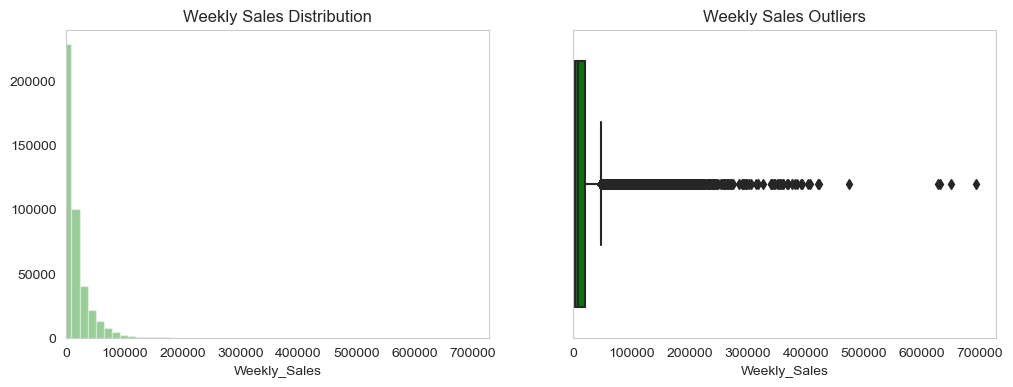

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 4))

sns.distplot(df['Weekly_Sales'], kde = False, ax = ax1, color = 'green')

ax1.grid(False)
ax1.set_title('Weekly Sales Distribution')
ax1.set_xlim(0)

sns.boxplot(df['Weekly_Sales'], ax = ax2, color = 'green')

ax2.grid(False)
ax2.set_title('Weekly Sales Outliers')
ax2.set_xlim(0)
             
plt.show()

In [15]:
# removing outliers
df = df[df['Weekly_Sales'] < df['Weekly_Sales'].quantile(q = 0.98)]

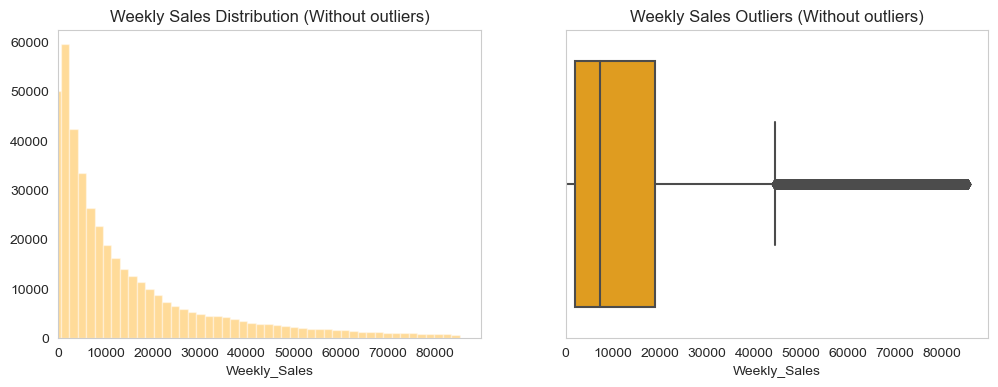

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 4))

sns.distplot(df['Weekly_Sales'], kde = False, ax = ax1, color = 'orange')

ax1.grid(False)
ax1.set_title('Weekly Sales Distribution (Without outliers)')
ax1.set_xlim(0)

sns.boxplot(df['Weekly_Sales'], ax = ax2, color = 'orange')

ax2.grid(False)
ax2.set_title('Weekly Sales Outliers (Without outliers)')
ax2.set_xlim(0)
plt.show()

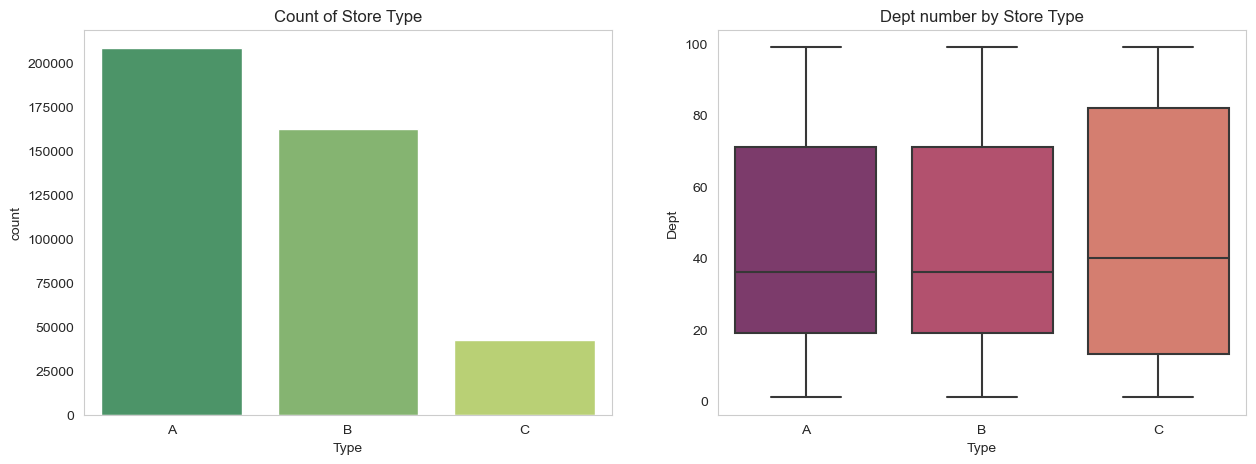

In [17]:
fig, (ax1, ax2) = plt.subplots(sharex = False, sharey = False, ncols = 2, figsize = (15, 5))
 
sns.countplot(df['Type'], palette = 'summer', ax = ax1)

ax1.grid(False)
ax1.set_title('Count of Store Type');

sns.boxplot(x = 'Type', y = 'Dept', data = df, palette = 'flare_r', ax = ax2)

ax2.grid(False)
ax2.set_title('Dept number by Store Type');

plt.show()

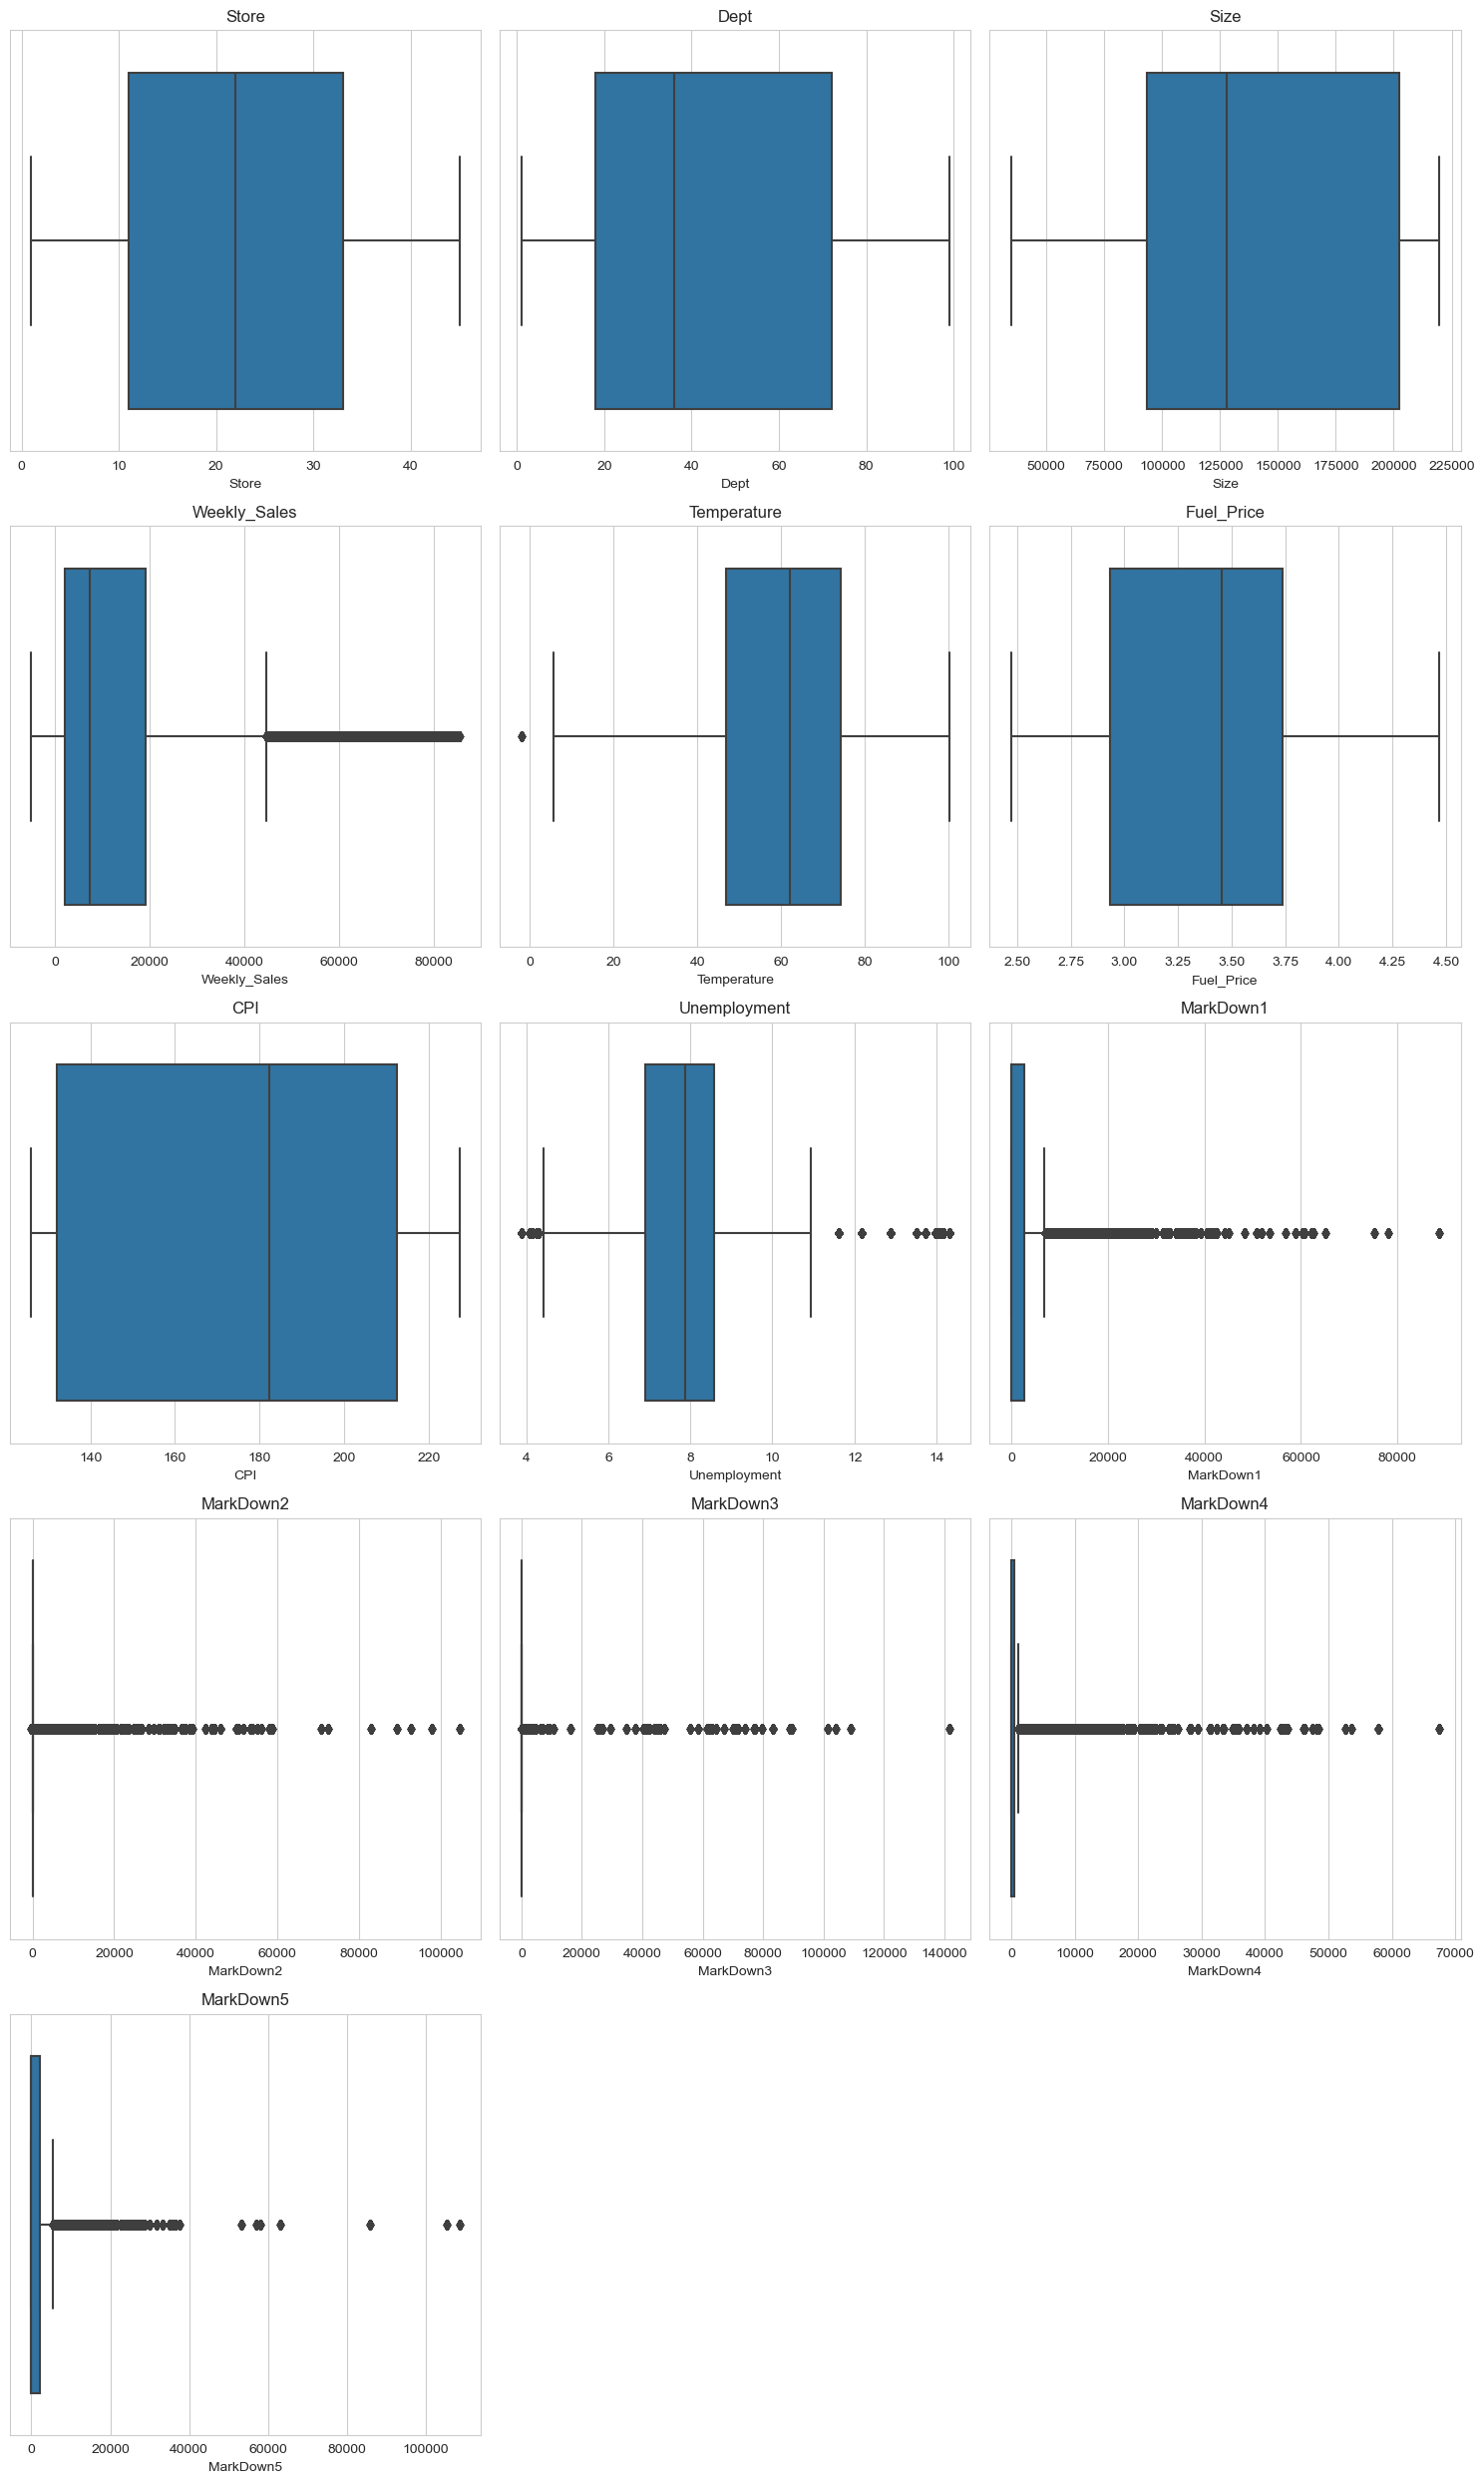

In [18]:
# Get the names of all columns with data type 'int' or 'float'
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

### Analysis of coorelation between features

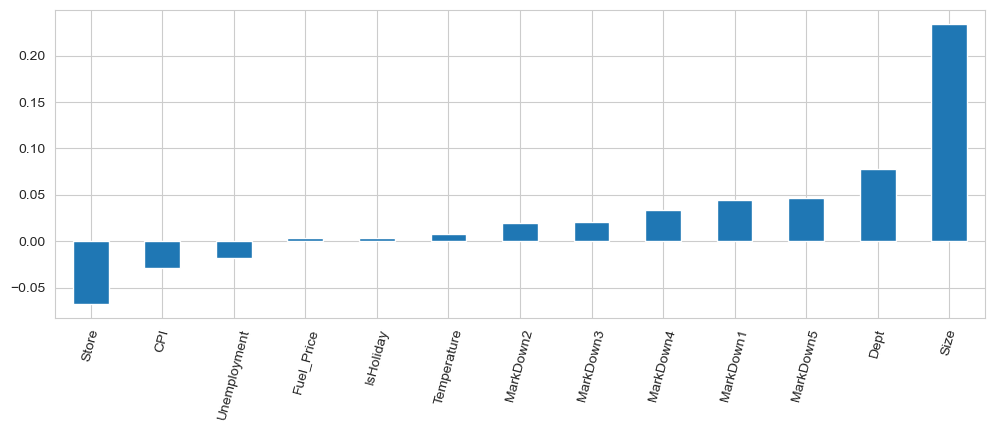

In [19]:
plt.figure(figsize=(12,4))
df.corr()['Weekly_Sales'].sort_values()[:-1].plot(kind='bar')
plt.xticks(rotation=75)
plt.show()

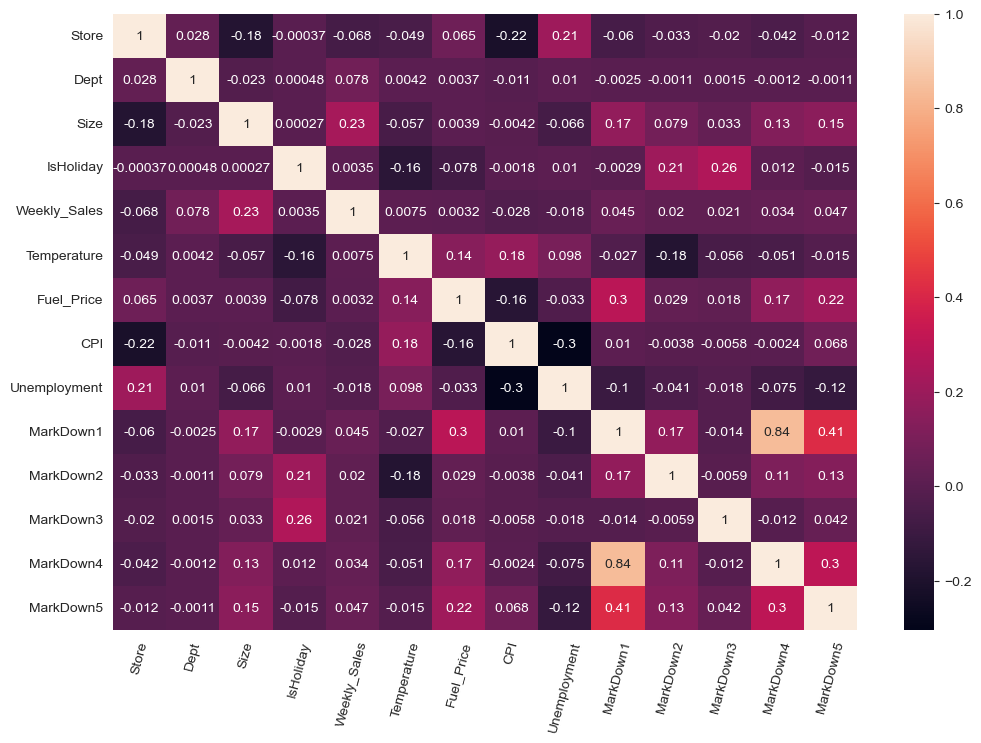

In [20]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), fmt='.2g', annot=True)
plt.xticks(rotation=75)
plt.show()

### Weekly_Sales vs. Date

In [21]:
# converting 'Date' to datetime
df['Date'] = df['Date'].apply(pd.to_datetime)

In [22]:
df['Day'] = df['Date'].apply(lambda date: date.day)
df['Week'] = df['Date'].apply(lambda date: date.week)
df['Month'] = df['Date'].apply(lambda date: date.month)
df['Year'] = df['Date'].apply(lambda date: date.year)
df.head()

,Store,Dept,Type,Size,Date,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Day,Week,Month,Year
0,1,1,A,151315,2010-02-05,False,24924.50,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,5,5,2,2010
1,1,2,A,151315,2010-02-05,False,50605.27,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,5,5,2,2010
2,1,3,A,151315,2010-02-05,False,13740.12,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,5,5,2,2010
3,1,4,A,151315,2010-02-05,False,39954.04,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,5,5,2,2010
4,1,5,A,151315,2010-02-05,False,32229.38,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,5,5,2,2010


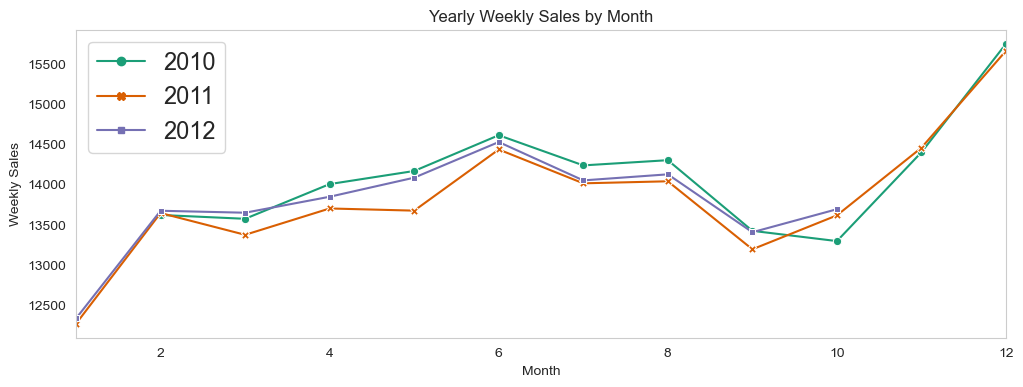

In [23]:
plt.figure(figsize = (12, 4))

sns.lineplot(x = 'Month', y = 'Weekly_Sales', data = df, hue = 'Year', ci = None, palette = 'Dark2', 
            markers = True, dashes = False, style = 'Year')

plt.xlim(df['Month'].min(), df['Month'].max())
plt.legend(loc = 2, prop = {'size' : 17}, fontsize = 30)
plt.grid(False)
plt.ylabel('Weekly Sales')
plt.title('Yearly Weekly Sales by Month')
plt.show()

In [24]:
df.set_index('Date', inplace = True)

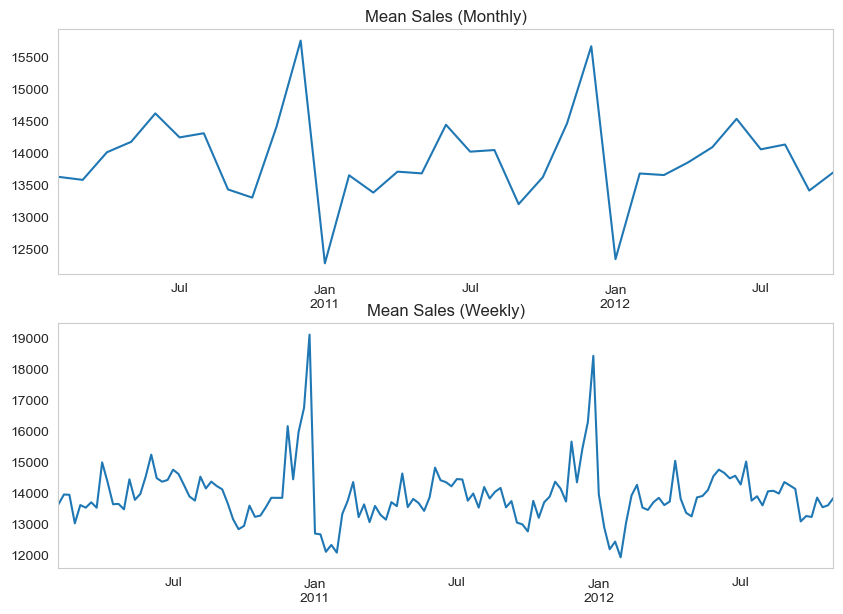

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 7), sharex = False)

df.resample('MS').mean()['Weekly_Sales'].plot(ax = ax1)
ax1.set_xlabel('')
ax1.set_title('Mean Sales (Monthly)')
ax1.grid(False)


df.resample('W').mean()['Weekly_Sales'].plot(ax = ax2)
ax2.set_xlabel('')
ax2.set_title('Mean Sales (Weekly)')
ax2.grid(False)

## Label Encoding

In [26]:
TypeDummies = pd.get_dummies(df['Type'], drop_first = True)

df[['TypeB', 'TypeC']] = TypeDummies

In [27]:
df.drop('Type', axis = 1, inplace = True)
df.head()

,Store,Dept,Size,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Day,Week,Month,Year,TypeB,TypeC
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,151315,False,24924.50,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,5,5,2,2010,0,0
2010-02-05,1,2,151315,False,50605.27,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,5,5,2,2010,0,0
2010-02-05,1,3,151315,False,13740.12,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,5,5,2,2010,0,0
2010-02-05,1,4,151315,False,39954.04,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,5,5,2,2010,0,0
2010-02-05,1,5,151315,False,32229.38,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,5,5,2,2010,0,0


## Resample data

In [28]:
df = df.resample('W').mean()

In [29]:
df['Date'] = df.index
df['Date'] = df['Date'].apply(pd.to_datetime)

In [30]:
df.head()

,Store,Dept,Size,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Day,Week,Month,Year,TypeB,TypeC,Date
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-07,22.198324,43.313547,135974.181564,0.0,13616.850168,33.231732,2.717343,167.345790,8.575185,0.0,0.0,0.0,0.0,0.0,5.0,5.0,2.0,2010.0,0.397346,0.101606,2010-02-07
2010-02-14,22.129334,43.589459,136578.964286,1.0,13933.499397,33.339424,2.695726,167.420446,8.563930,0.0,0.0,0.0,0.0,0.0,12.0,6.0,2.0,2010.0,0.397018,0.098821,2010-02-14
2010-02-21,22.171939,43.569120,136170.707015,0.0,13924.474601,37.039801,2.673131,167.343488,8.575207,0.0,0.0,0.0,0.0,0.0,19.0,7.0,2.0,2010.0,0.397180,0.100069,2010-02-21
2010-02-28,22.149914,43.517444,136438.956131,0.0,13001.663637,38.596729,2.685257,167.639975,8.558581,0.0,0.0,0.0,0.0,0.0,26.0,8.0,2.0,2010.0,0.395855,0.100173,2010-02-28
2010-03-07,22.179416,43.423157,136437.957928,0.0,13592.412632,42.372702,2.731754,167.715392,8.572454,0.0,0.0,0.0,0.0,0.0,5.0,9.0,3.0,2010.0,0.394298,0.100834,2010-03-07


## Weekly Sales Analysis

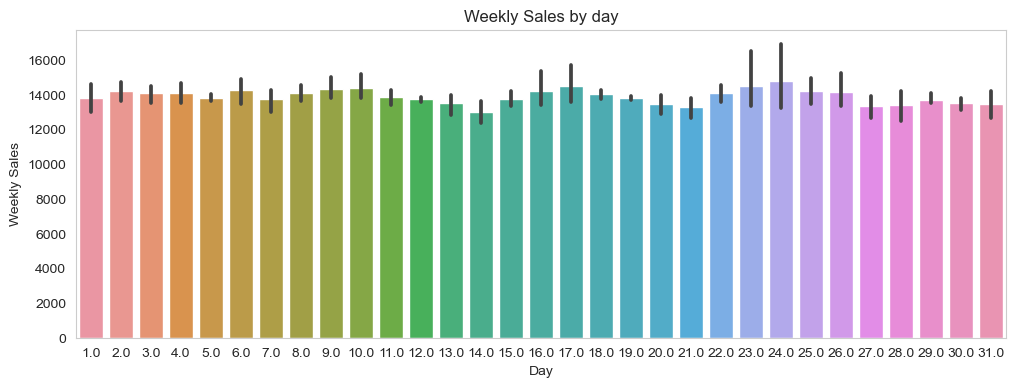

In [31]:
plt.figure(figsize = (12, 4))

sns.barplot(x = 'Day', y = 'Weekly_Sales', data = df)

plt.grid(False)
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales by day')
plt.show()

In [32]:
df['Day_Of_Week'] = df['Date'].apply(lambda date: date.dayofweek)

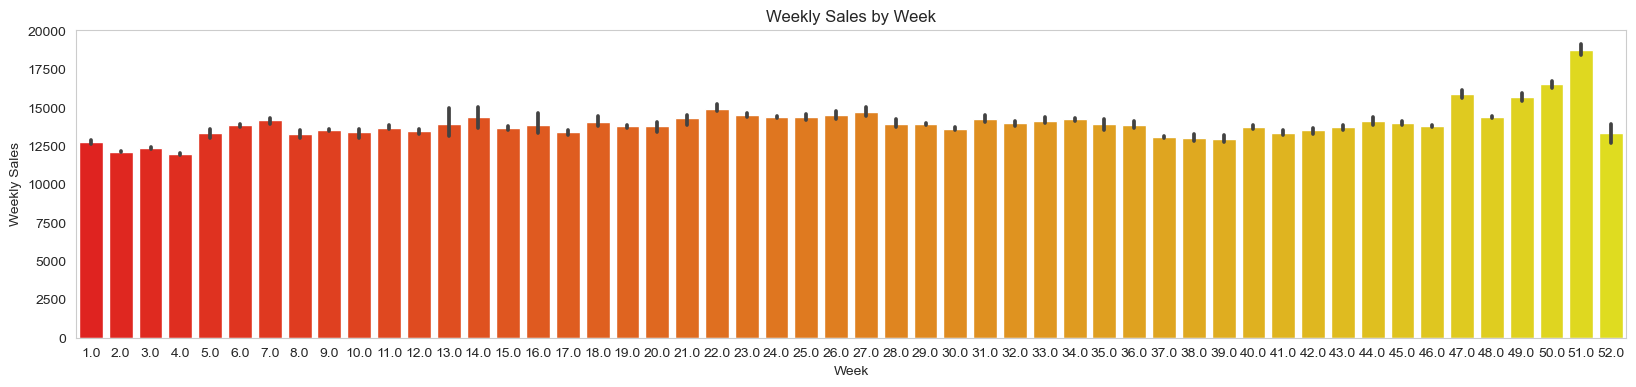

In [33]:
plt.figure(figsize = (20, 4))

sns.barplot(x = 'Week', y = 'Weekly_Sales', data = df, palette = 'autumn')

plt.grid(False)
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales by Week')
plt.show()

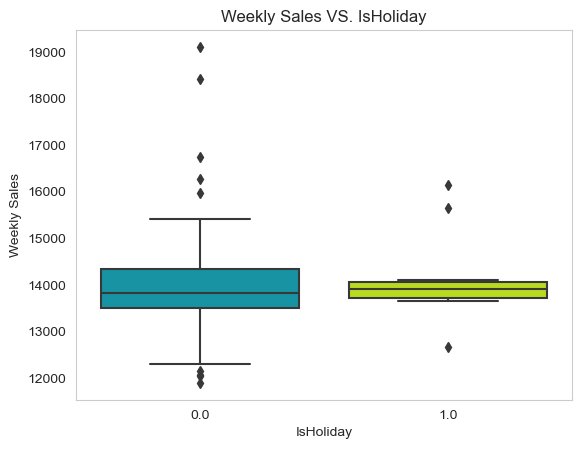

In [34]:
sns.boxplot(x = 'IsHoliday', y = 'Weekly_Sales', data = df, palette = 'nipy_spectral')

plt.grid(False)
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales VS. IsHoliday')
plt.show()

In [35]:
df[df['IsHoliday'] == True]['Date'].unique()

array(['2010-02-14T00:00:00.000000000', '2010-09-12T00:00:00.000000000',
       '2010-11-28T00:00:00.000000000', '2011-01-02T00:00:00.000000000',
       '2011-02-13T00:00:00.000000000', '2011-09-11T00:00:00.000000000',
       '2011-11-27T00:00:00.000000000', '2012-01-01T00:00:00.000000000',
       '2012-02-12T00:00:00.000000000', '2012-09-09T00:00:00.000000000'],
      dtype='datetime64[ns]')

From the dates we can deduce that we have the next holidays: 

**Super Bowl**

2010-02-14, 2011-02-13, 2012-02-12  

**Labor day**

2010-09-12, 2011-09-11, 2012-09-09  

**Thanksgiving**

2010-11-28, 2011-11-27

**Christmas**

2011-01-02, 2012-01-01

In [36]:
df['Super Bowl'] = df['Date'].apply(lambda date: True if date in [pd.to_datetime('2010-02-14'), 
                                                                     pd.to_datetime('2011-02-13'),
                                                                     pd.to_datetime('2012-02-12')] else False)

df['Labor day'] = df['Date'].apply(lambda date: True if date in [pd.to_datetime('2010-09-12'), 
                                                                     pd.to_datetime('2011-09-11'),
                                                                     pd.to_datetime('2012-09-09')] else False)

df['Thanksgiving'] = df['Date'].apply(lambda date: True if date in [pd.to_datetime('2010-11-28'), 
                                                                     pd.to_datetime('2011-11-27')] else False)

df['Christmas'] = df['Date'].apply(lambda date: True if date in [pd.to_datetime('2011-01-02'), 
                                                                     pd.to_datetime('2012-01-01')] else False)

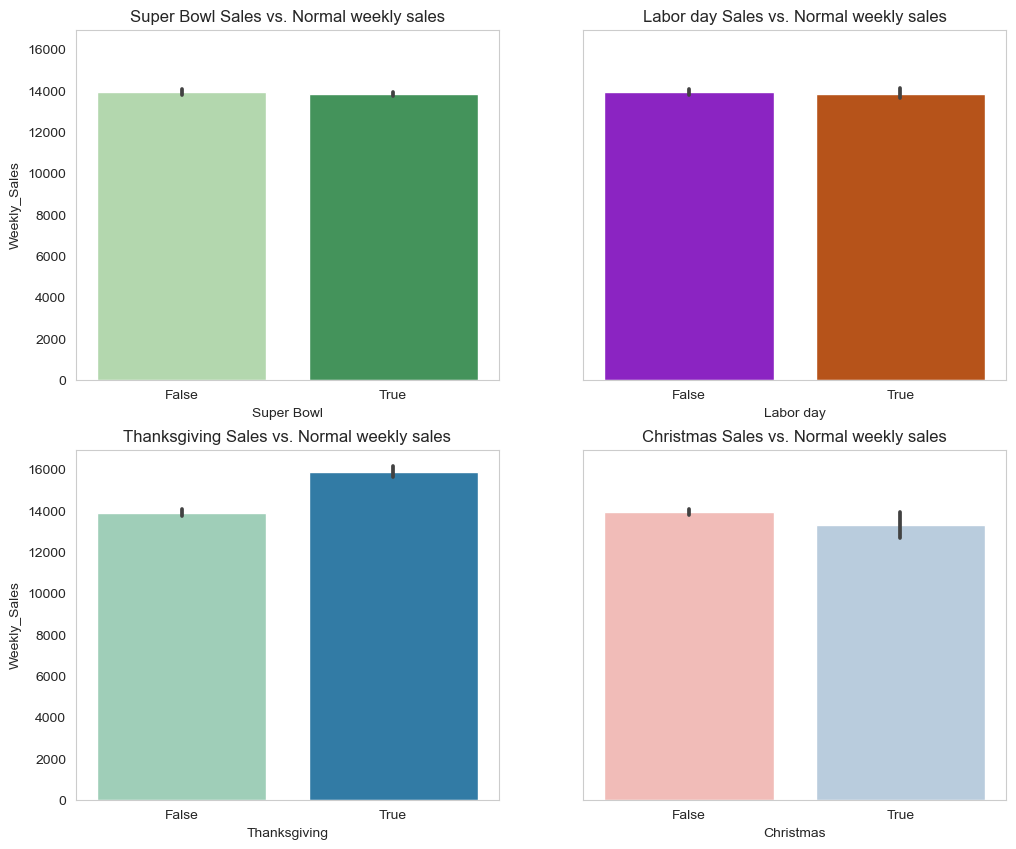

In [37]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols = 2, nrows = 2, sharex = False, sharey = True, figsize = (12, 10))

# Super Bowl ------------------------------------------------------------

sns.barplot(x = 'Super Bowl', y = 'Weekly_Sales', data = df, ax = ax1, palette = 'Greens')

ax1.set_title('Super Bowl Sales vs. Normal weekly sales')
ax1.grid(False)

# Labor day ------------------------------------------------------------

sns.barplot(x = 'Labor day', y = 'Weekly_Sales', data = df, ax = ax2, palette = 'gnuplot')

ax2.set_title('Labor day Sales vs. Normal weekly sales')
ax2.set_ylabel('')
ax2.grid(False)

# Thanksgiving ------------------------------------------------------------

sns.barplot(x = 'Thanksgiving', y = 'Weekly_Sales', data = df, ax = ax3, palette = 'YlGnBu')

ax3.set_title('Thanksgiving Sales vs. Normal weekly sales')
ax3.grid(False)

# Christmas ------------------------------------------------------------

sns.barplot(x = 'Christmas', y = 'Weekly_Sales', data = df, ax = ax4, palette = 'Pastel1')

ax4.set_title('Christmas Sales vs. Normal weekly sales')
ax4.set_ylabel('')
ax4.grid(False)
plt.show()

### Weekly Sales by Temperature

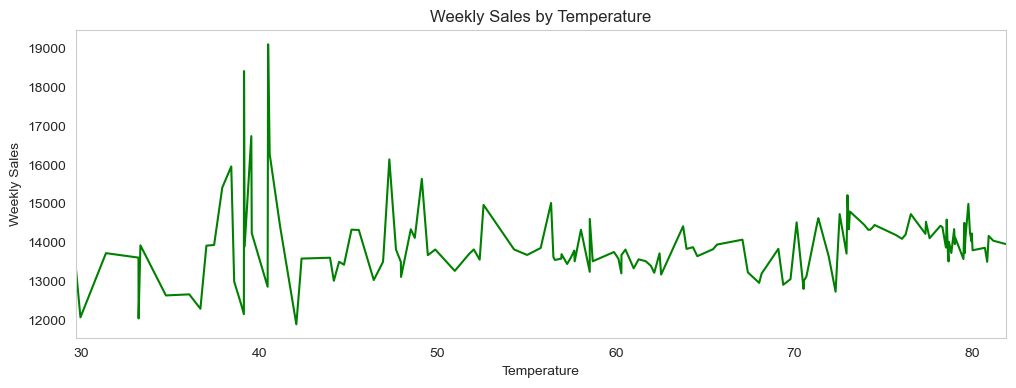

In [38]:
plt.figure(figsize = (12, 4))

sns.lineplot(y = 'Weekly_Sales', x = 'Temperature', data = df, ci = None, color = 'green')

plt.grid(False)
plt.title('Weekly Sales by Temperature')
plt.ylabel('Weekly Sales')
plt.xlim(df['Temperature'].min(), df['Temperature'].max())
plt.show()

In [39]:
ByTemperature = pd.DataFrame(round(df).groupby('Temperature').mean()['Weekly_Sales']).reset_index()

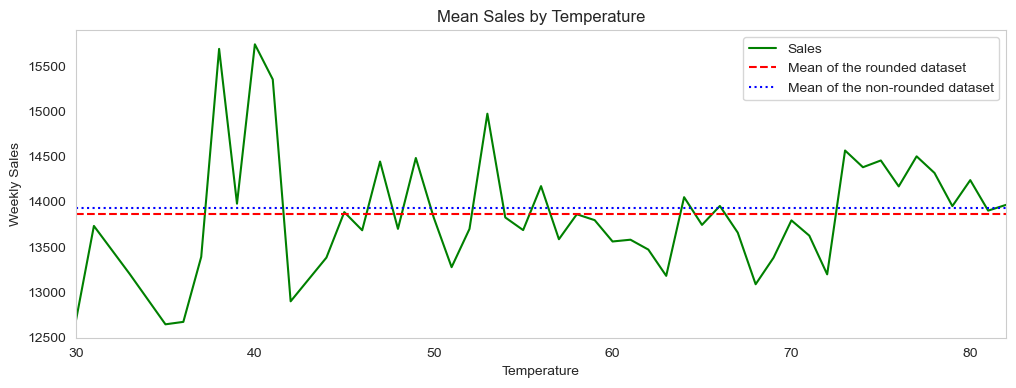

In [40]:
plt.figure(figsize = (12, 4))

sns.lineplot(data = ByTemperature, x = 'Temperature', y = 'Weekly_Sales', color = 'green', label = 'Sales')

plt.axhline(y = ByTemperature['Weekly_Sales'].mean(), color = 'r', linestyle = '--', 
            label = 'Mean of the rounded dataset')

plt.axhline(y = df['Weekly_Sales'].mean(), color = 'b', linestyle = ':', 
            label = 'Mean of the non-rounded dataset')

plt.legend()
plt.grid(False)
plt.xlim(ByTemperature['Temperature'].min(), ByTemperature['Temperature'].max())
plt.title('Mean Sales by Temperature')
plt.ylabel('Weekly Sales')
plt.show()

### Weekly Sales by Fuel price

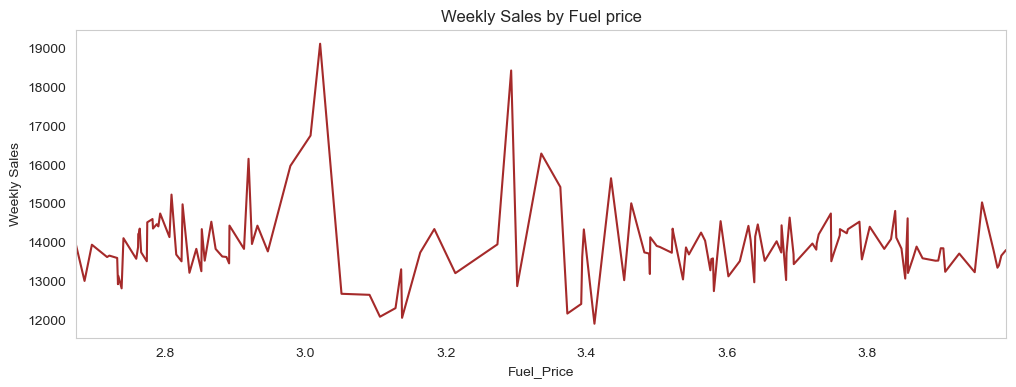

In [41]:
plt.figure(figsize = (12, 4))

sns.lineplot(x = 'Fuel_Price', y = 'Weekly_Sales', data = df, ci = None, color = 'brown')

plt.grid(False)
plt.title('Weekly Sales by Fuel price')
plt.ylabel('Weekly Sales')
plt.xlim(df['Fuel_Price'].min(), df['Fuel_Price'].max())
plt.show()

In [42]:
ByFuelPrice = pd.DataFrame(round(df, 1).groupby('Fuel_Price').mean()['Weekly_Sales']).reset_index()

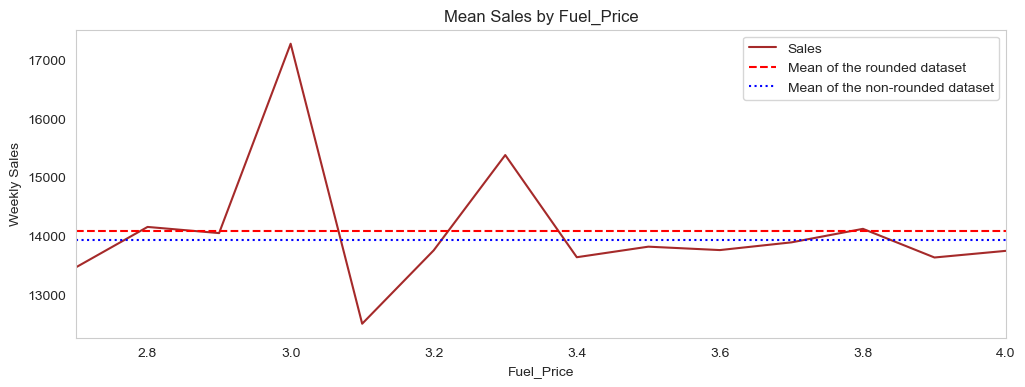

In [43]:
plt.figure(figsize = (12, 4))

sns.lineplot(data = ByFuelPrice, x = 'Fuel_Price', y = 'Weekly_Sales', color = 'brown', label = 'Sales')

plt.axhline(y = ByFuelPrice['Weekly_Sales'].mean(), color = 'r', linestyle = '--', 
            label = 'Mean of the rounded dataset')

plt.axhline(y = df['Weekly_Sales'].mean(), color = 'b', linestyle = ':', 
            label = 'Mean of the non-rounded dataset')


plt.legend(loc = 'upper right')
plt.grid(False)
plt.xlim(ByFuelPrice['Fuel_Price'].min(), ByFuelPrice['Fuel_Price'].max())
plt.title('Mean Sales by Fuel_Price')
plt.ylabel('Weekly Sales')
plt.show()

### Weekly Sales by CPI

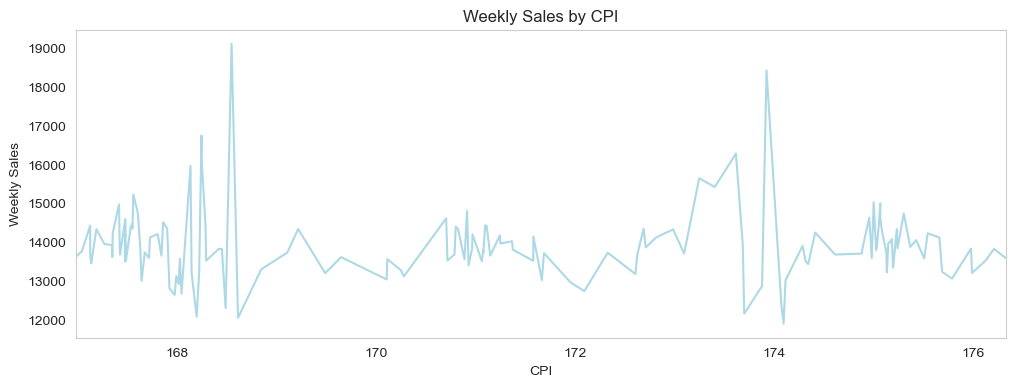

In [44]:
plt.figure(figsize = (12, 4))

sns.lineplot(x = 'CPI', y = 'Weekly_Sales', data = df, ci = None, color = 'lightblue')

plt.grid(False)
plt.title('Weekly Sales by CPI')
plt.ylabel('Weekly Sales')
plt.xlim(df['CPI'].min(), df['CPI'].max())
plt.show()

In [45]:
ByCPI = pd.DataFrame(round(df).groupby('CPI').mean()['Weekly_Sales']).reset_index()

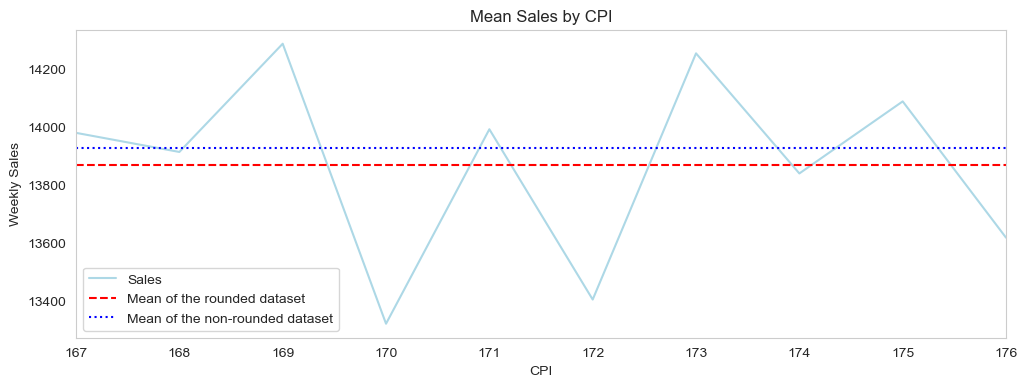

In [46]:
plt.figure(figsize = (12, 4))

sns.lineplot(data = ByCPI, x = 'CPI', y = 'Weekly_Sales', color = 'lightblue', label = 'Sales')

plt.axhline(y = ByCPI['Weekly_Sales'].mean(), color = 'r', linestyle = '--', 
            label = 'Mean of the rounded dataset')

plt.axhline(y = df['Weekly_Sales'].mean(), color = 'b', linestyle = ':', 
            label = 'Mean of the non-rounded dataset')


plt.legend(loc = 'lower left')
plt.grid(False)
plt.xlim(ByCPI['CPI'].min(), ByCPI['CPI'].max())
plt.title('Mean Sales by CPI')
plt.ylabel('Weekly Sales')
plt.show()

### Weekly Sales by Unemployment

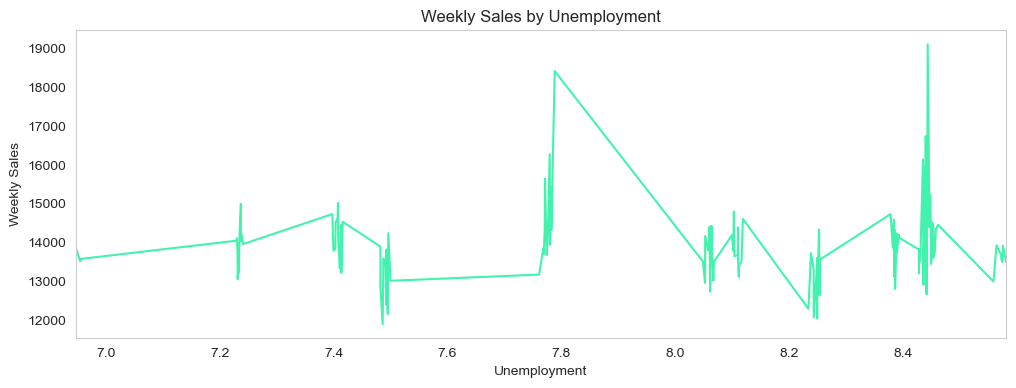

In [47]:
plt.figure(figsize = (12, 4))

sns.lineplot(x = 'Unemployment', y = 'Weekly_Sales', data = df, ci = None, color = '#42F3AD')

plt.grid(False)
plt.title('Weekly Sales by Unemployment')
plt.ylabel('Weekly Sales')
plt.xlim(df['Unemployment'].min(), df['Unemployment'].max())
plt.show()

In [48]:
ByUnemployment = pd.DataFrame(round(df, 2).groupby('Unemployment').mean()['Weekly_Sales']).reset_index()

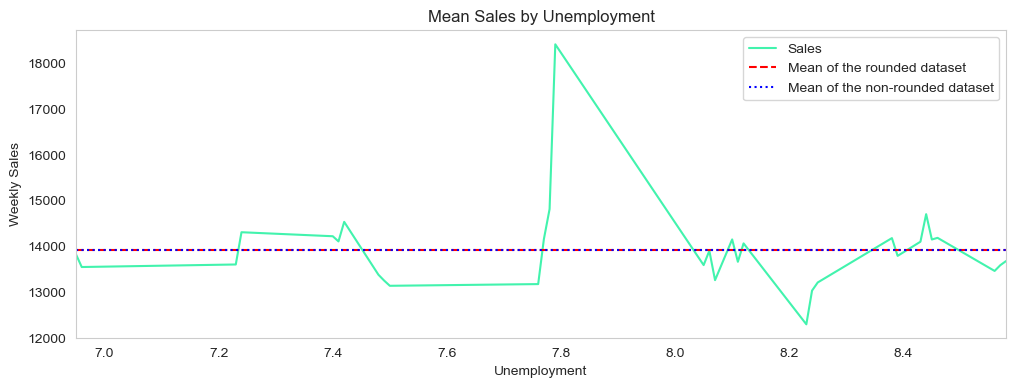

In [49]:
plt.figure(figsize = (12, 4))

sns.lineplot(data = ByUnemployment, x = 'Unemployment', y = 'Weekly_Sales', color = '#42F3AD', label = 'Sales')

plt.axhline(y = ByUnemployment['Weekly_Sales'].mean(), color = 'r', linestyle = '--', 
            label = 'Mean of the rounded dataset')

plt.axhline(y = df['Weekly_Sales'].mean(), color = 'b', linestyle = ':', 
            label = 'Mean of the non-rounded dataset')


plt.legend(loc = 'upper right')
plt.grid(False)
plt.xlim(ByUnemployment['Unemployment'].min(), ByUnemployment['Unemployment'].max())
plt.title('Mean Sales by Unemployment')
plt.ylabel('Weekly Sales')
plt.show()

### Weekly Sales by MarkDown

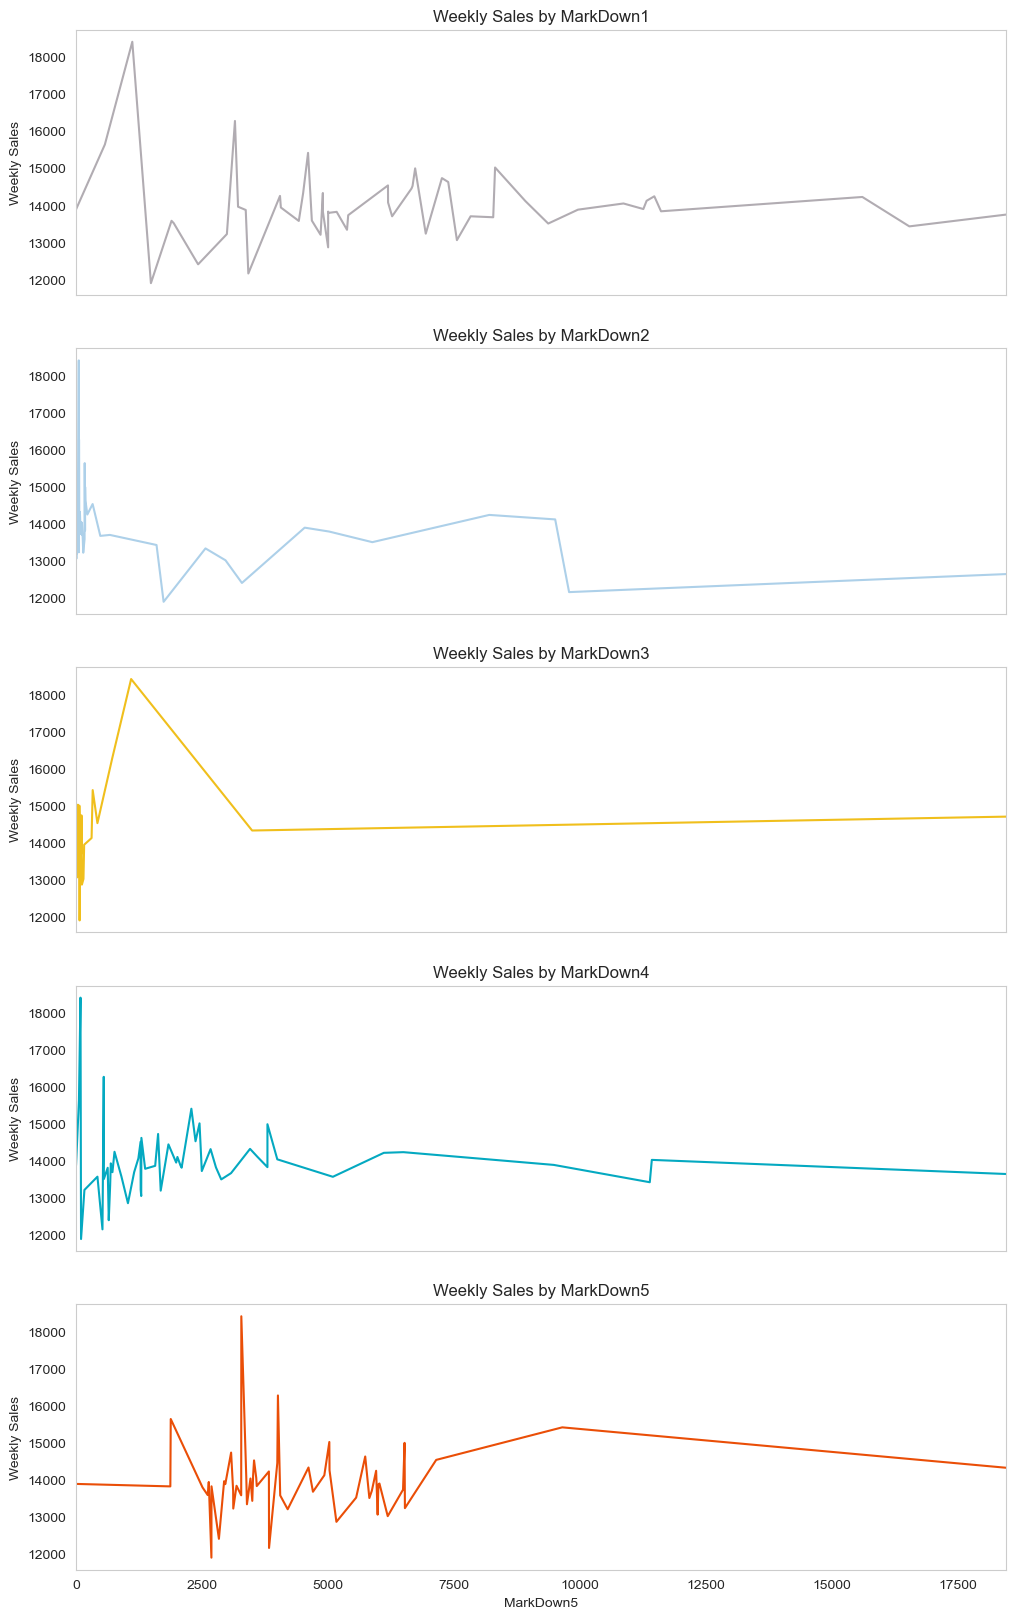

In [50]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 5, ncols = 1, sharex = True, figsize = (12, 20))

# MarkDown1 ---------------------------------------------------------------------------------------------------------------


sns.lineplot(x = 'MarkDown1', y = 'Weekly_Sales', data = df, ci = None, color = '#B1ACB2', ax = ax1)

ax1.grid(False)
ax1.set_title('Weekly Sales by MarkDown1')
ax1.set_ylabel('Weekly Sales')
ax1.set_xlim(df['MarkDown1'].min(), df['MarkDown1'].max())

# MarkDown2 ---------------------------------------------------------------------------------------------------------------

sns.lineplot(x = 'MarkDown2', y = 'Weekly_Sales', data = df, ci = None, color = '#ADD0E9', ax = ax2)

ax2.grid(False)
ax2.set_title('Weekly Sales by MarkDown2')
ax2.set_ylabel('Weekly Sales')
ax2.set_xlim(df['MarkDown2'].min(), df['MarkDown2'].max())

# MarkDown3 ---------------------------------------------------------------------------------------------------------------

sns.lineplot(x = 'MarkDown3', y = 'Weekly_Sales', data = df, ci = None, color = '#F0BF1C', ax = ax3)

ax3.grid(False)
ax3.set_title('Weekly Sales by MarkDown3')
ax3.set_ylabel('Weekly Sales')
ax3.set_xlim(df['MarkDown3'].min(), df['MarkDown3'].max())

# MarkDown4 ---------------------------------------------------------------------------------------------------------------

sns.lineplot(x = 'MarkDown4', y = 'Weekly_Sales', data = df, ci = None, color = '#04A9C1', ax = ax4)

ax4.grid(False)
ax4.set_title('Weekly Sales by MarkDown4')
ax4.set_ylabel('Weekly Sales')
ax4.set_xlim(df['MarkDown4'].min(), df['MarkDown4'].max())

# MarkDown5 ---------------------------------------------------------------------------------------------------------------

sns.lineplot(x = 'MarkDown5', y = 'Weekly_Sales', data = df, ci = None, color = '#EA4E07', ax = ax5)

ax5.grid(False)
ax5.set_title('Weekly Sales by MarkDown5')
ax5.set_ylabel('Weekly Sales')
ax5.set_xlim(df['MarkDown5'].min(), df['MarkDown5'].max())
plt.show()

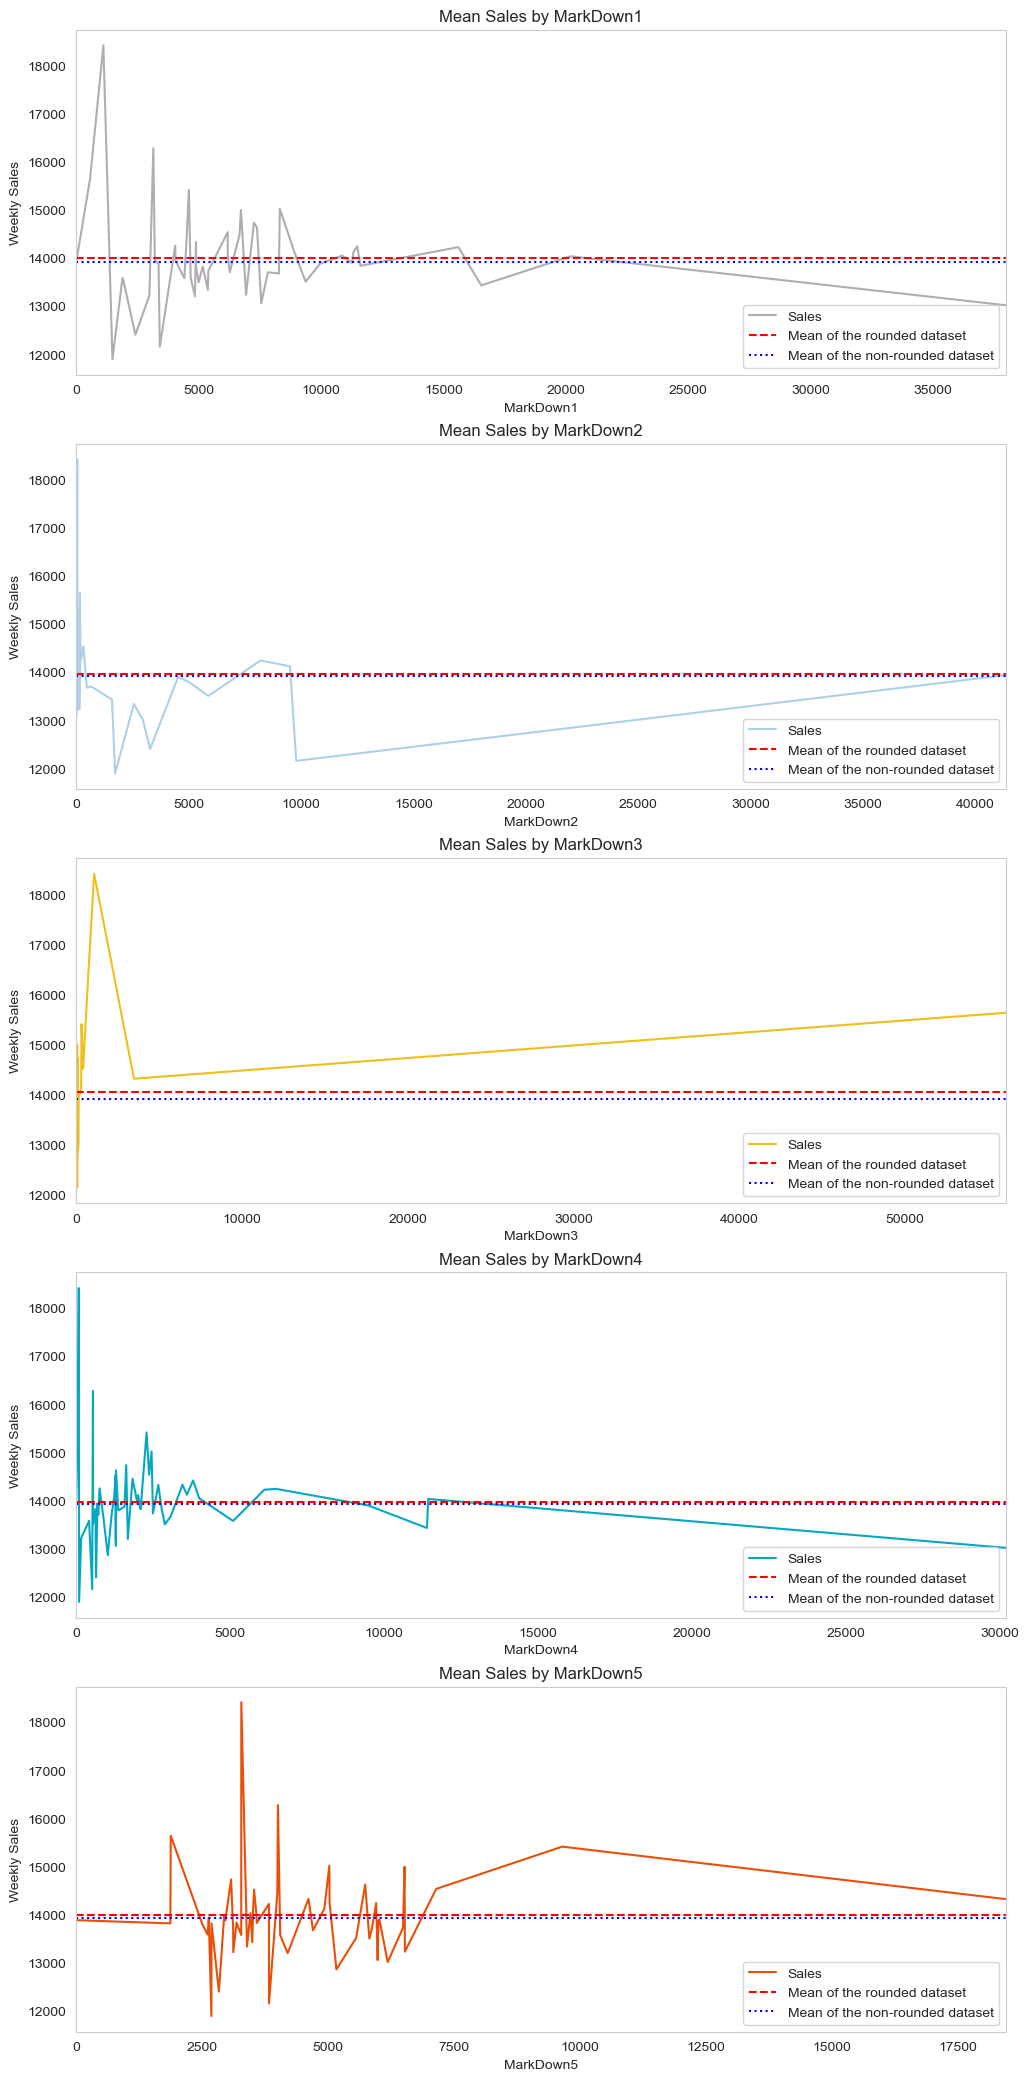

In [51]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 5, ncols = 1, sharex = False, figsize = (12, 26))


# MarkDown1 ---------------------------------------------------------------------------------------------------------------


ByMarkDown1 = pd.DataFrame(round(df).groupby('MarkDown1').mean()['Weekly_Sales']).reset_index()

sns.lineplot(data = ByMarkDown1, x = 'MarkDown1', y = 'Weekly_Sales', color = '#B1ACB2', label = 'Sales', ax = ax1)

ax1.axhline(y = ByMarkDown1['Weekly_Sales'].mean(), color = 'r', linestyle = '--', 
            label = 'Mean of the rounded dataset')

ax1.axhline(y = df['Weekly_Sales'].mean(), color = 'b', linestyle = ':', 
            label = 'Mean of the non-rounded dataset')


ax1.legend(loc = 'lower right')
ax1.grid(False)
ax1.set_xlim(ByMarkDown1['MarkDown1'].min(), ByMarkDown1['MarkDown1'].max())
ax1.set_title('Mean Sales by MarkDown1')
ax1.set_ylabel('Weekly Sales')


# MarkDown2 ---------------------------------------------------------------------------------------------------------------


ByMarkDown2 = pd.DataFrame(round(df).groupby('MarkDown2').mean()['Weekly_Sales']).reset_index()

sns.lineplot(data = ByMarkDown2, x = 'MarkDown2', y = 'Weekly_Sales', color = '#ADD0E9', label = 'Sales', ax = ax2)

ax2.axhline(y = ByMarkDown2['Weekly_Sales'].mean(), color = 'r', linestyle = '--', 
            label = 'Mean of the rounded dataset')

ax2.axhline(y = df['Weekly_Sales'].mean(), color = 'b', linestyle = ':', 
            label = 'Mean of the non-rounded dataset')


ax2.legend(loc = 'lower right')
ax2.grid(False)
ax2.set_xlim(ByMarkDown2['MarkDown2'].min(), ByMarkDown2['MarkDown2'].max())
ax2.set_title('Mean Sales by MarkDown2')
ax2.set_ylabel('Weekly Sales')


# MarkDown3 ---------------------------------------------------------------------------------------------------------------


ByMarkDown3 = pd.DataFrame(round(df).groupby('MarkDown3').mean()['Weekly_Sales']).reset_index()

sns.lineplot(data = ByMarkDown3, x = 'MarkDown3', y = 'Weekly_Sales', color = '#F0BF1C', label = 'Sales', ax = ax3)

ax3.axhline(y = ByMarkDown3['Weekly_Sales'].mean(), color = 'r', linestyle = '--', 
            label = 'Mean of the rounded dataset')

ax3.axhline(y = df['Weekly_Sales'].mean(), color = 'b', linestyle = ':', 
            label = 'Mean of the non-rounded dataset')


ax3.legend(loc = 'lower right')
ax3.grid(False)
ax3.set_xlim(ByMarkDown3['MarkDown3'].min(), ByMarkDown3['MarkDown3'].max())
ax3.set_title('Mean Sales by MarkDown3')
ax3.set_ylabel('Weekly Sales')


# MarkDown4---------------------------------------------------------------------------------------------------------------


ByMarkDown4 = pd.DataFrame(round(df).groupby('MarkDown4').mean()['Weekly_Sales']).reset_index()

sns.lineplot(data = ByMarkDown4, x = 'MarkDown4', y = 'Weekly_Sales', color = '#04A9C1', label = 'Sales', ax = ax4)

ax4.axhline(y = ByMarkDown4['Weekly_Sales'].mean(), color = 'r', linestyle = '--', 
            label = 'Mean of the rounded dataset')

ax4.axhline(y = df['Weekly_Sales'].mean(), color = 'b', linestyle = ':', 
            label = 'Mean of the non-rounded dataset')


ax4.legend(loc = 'lower right')
ax4.grid(False)
ax4.set_xlim(ByMarkDown4['MarkDown4'].min(), ByMarkDown4['MarkDown4'].max())
ax4.set_title('Mean Sales by MarkDown4')
ax4.set_ylabel('Weekly Sales')


# MarkDown5 ---------------------------------------------------------------------------------------------------------------


ByMarkDown5 = pd.DataFrame(round(df).groupby('MarkDown5').mean()['Weekly_Sales']).reset_index()

sns.lineplot(data = ByMarkDown5, x = 'MarkDown5', y = 'Weekly_Sales', color = '#EA4E07', label = 'Sales', ax = ax5)

ax5.axhline(y = ByMarkDown5['Weekly_Sales'].mean(), color = 'r', linestyle = '--', 
            label = 'Mean of the rounded dataset')

ax5.axhline(y = df['Weekly_Sales'].mean(), color = 'b', linestyle = ':', 
            label = 'Mean of the non-rounded dataset')


ax5.legend(loc = 'lower right')
ax5.grid(False)
ax5.set_xlim(ByMarkDown5['MarkDown5'].min(), ByMarkDown5['MarkDown5'].max())
ax5.set_title('Mean Sales by MarkDown5')
ax5.set_ylabel('Weekly Sales')
plt.show()

It is really hard to make conclusions without knowing what the variable is. 

**MarkDown1:** The mean of the rounded dataset and the mean of the non-rounded dataset it's pretty much the same, this means that I could not reduce the noise and it's at its limit already. It is hard to notice patterns but I can see that mean sales raises with MarkDown 0 to 2000. After that it gets really messy and I have less observations.


**MarkDown2:** Most of the observations are 0.0, and I can see this affected the mean value of the feature. I notice a drop in 10000 and then a hard line to 40000 this is probably due to small portion of observations.


**MarkDown3:** The mean of the rounded dataset and the mean of the non-rounded dataset are far apart, this means that I reduced the noise too much. I can see a similar behavior to the MarkDown2 where most of the sample is 0.0 and then a hard line to max value due to little portion of observations.


**MarkDown4:** I notice something similar to the MarkDown1, where the mean increases as the markdown increases. In the higher MarkDowns there's no patterns, this is probably because there were not that many observations with those values.


**MarkDown5:** mean of the rounded dataset and the mean of the non-rounded are the same, so theres little to none modification with the noise reduce technique. I can see a peak in around 3000. Where the sales increase with the MarkDown value. In higher values there's no patterns, this is probably because of the same reason the MarkDown4 does not have patterns in high values. 

## Data Preprocessing 2

In [52]:
df.drop('Store IsHoliday Day Day_Of_Week Date'.split(), axis = 1, inplace = True)

In [53]:
for feature in ['Super Bowl', 'Labor day','Thanksgiving', 'Christmas']:
    df[feature] = df[feature].apply(lambda value: 1 if value else 0)
df.head()

,Dept,Size,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Week,Month,Year,TypeB,TypeC,Super Bowl,Labor day,Thanksgiving,Christmas
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-07,43.313547,135974.181564,13616.850168,33.231732,2.717343,167.345790,8.575185,0.0,0.0,0.0,0.0,0.0,5.0,2.0,2010.0,0.397346,0.101606,0,0,0,0
2010-02-14,43.589459,136578.964286,13933.499397,33.339424,2.695726,167.420446,8.563930,0.0,0.0,0.0,0.0,0.0,6.0,2.0,2010.0,0.397018,0.098821,1,0,0,0
2010-02-21,43.569120,136170.707015,13924.474601,37.039801,2.673131,167.343488,8.575207,0.0,0.0,0.0,0.0,0.0,7.0,2.0,2010.0,0.397180,0.100069,0,0,0,0
2010-02-28,43.517444,136438.956131,13001.663637,38.596729,2.685257,167.639975,8.558581,0.0,0.0,0.0,0.0,0.0,8.0,2.0,2010.0,0.395855,0.100173,0,0,0,0
2010-03-07,43.423157,136437.957928,13592.412632,42.372702,2.731754,167.715392,8.572454,0.0,0.0,0.0,0.0,0.0,9.0,3.0,2010.0,0.394298,0.100834,0,0,0,0


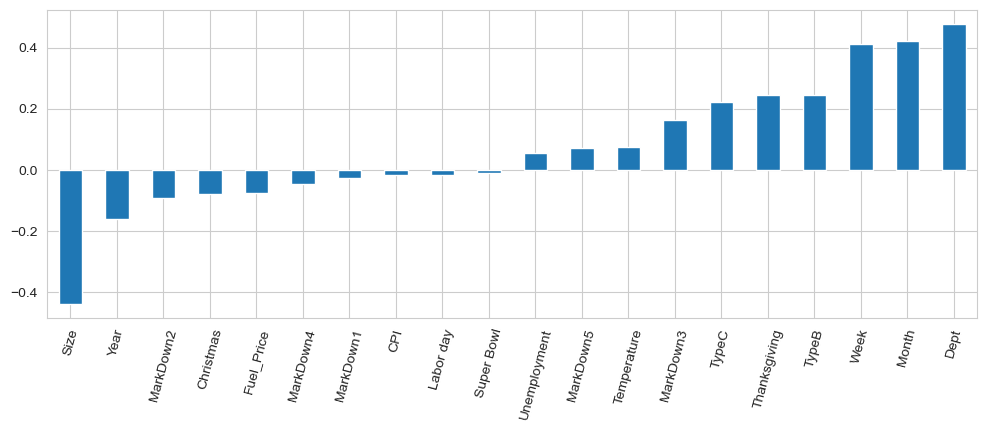

In [54]:
plt.figure(figsize=(12,4))
df.corr()['Weekly_Sales'].sort_values()[:-1].plot(kind='bar')
plt.xticks(rotation=75)
plt.show()

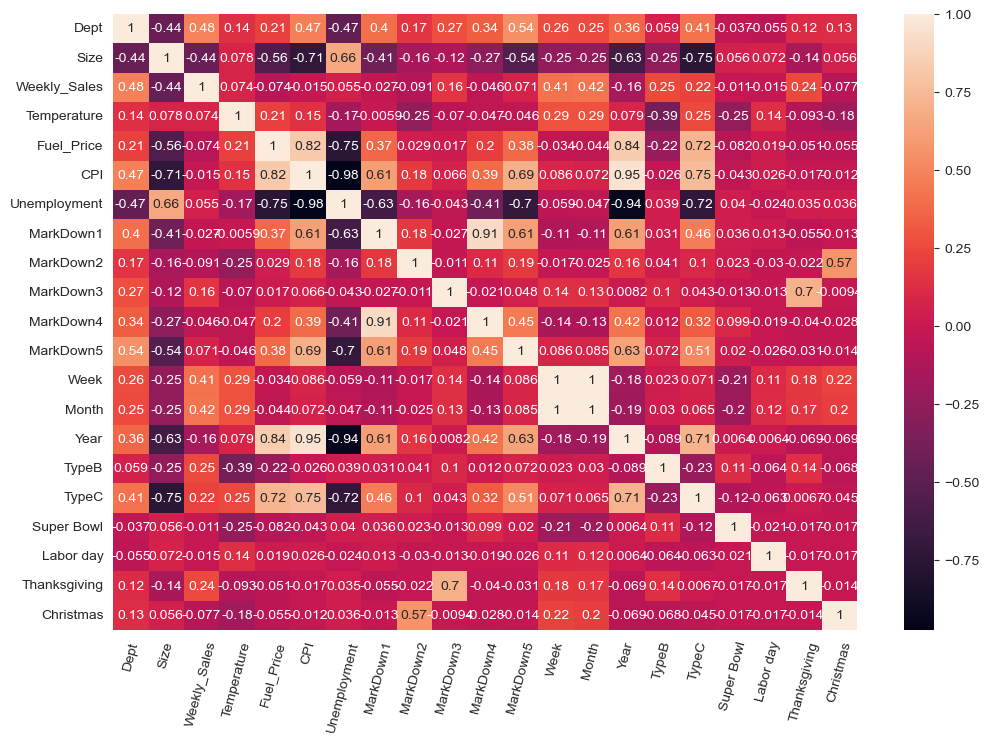

In [55]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), fmt='.2g', annot=True)
plt.xticks(rotation=75)
plt.show()

In [56]:
# MarkDown4 and MarkDown5 have a large correlation with MarkDown1. This can cause multicollinearity in our model.
df = df.drop('MarkDown4 MarkDown5'.split(), axis = 1)

In [57]:
# reorganized columns
cols = ['Weekly_Sales', 'Dept', 'Size', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Week', 'Month', 'Year', 'Super Bowl', 'Labor day', 'Thanksgiving', 'Christmas',
       'TypeB', 'TypeC', 'MarkDown1', 'MarkDown2', 'MarkDown3']

df = df[cols]

In [58]:
df.head()

,Weekly_Sales,Dept,Size,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year,Super Bowl,Labor day,Thanksgiving,Christmas,TypeB,TypeC,MarkDown1,MarkDown2,MarkDown3
Date,,,,,,,,,,,,,,,,,,,
2010-02-07,13616.850168,43.313547,135974.181564,33.231732,2.717343,167.345790,8.575185,5.0,2.0,2010.0,0,0,0,0,0.397346,0.101606,0.0,0.0,0.0
2010-02-14,13933.499397,43.589459,136578.964286,33.339424,2.695726,167.420446,8.563930,6.0,2.0,2010.0,1,0,0,0,0.397018,0.098821,0.0,0.0,0.0
2010-02-21,13924.474601,43.569120,136170.707015,37.039801,2.673131,167.343488,8.575207,7.0,2.0,2010.0,0,0,0,0,0.397180,0.100069,0.0,0.0,0.0
2010-02-28,13001.663637,43.517444,136438.956131,38.596729,2.685257,167.639975,8.558581,8.0,2.0,2010.0,0,0,0,0,0.395855,0.100173,0.0,0.0,0.0
2010-03-07,13592.412632,43.423157,136437.957928,42.372702,2.731754,167.715392,8.572454,9.0,3.0,2010.0,0,0,0,0,0.394298,0.100834,0.0,0.0,0.0


## Time Series Assumptions

### Multicollinearity
In order to check if or data has or I have introduced multicollinearity to our model I am gonna use the VIF. The VIF estimates how much the variance of a coefficient is “inflated” because of linear dependence with other predictors.

In [59]:
variables = df[['Size', 'Temperature', 'Fuel_Price', 'CPI', 
                          'Unemployment','MarkDown1', 'MarkDown2', 'MarkDown3']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, featurelen) for featurelen in range(variables.shape[1])]

vif["features"] = variables.columns

vif.round(2).sort_values(by = 'VIF', ascending = False)

,VIF,features
0,58774.08,Size
3,37933.20,CPI
4,3784.25,Unemployment
2,221.13,Fuel_Price
1,20.18,Temperature
5,2.26,MarkDown1
6,1.21,MarkDown2
7,1.06,MarkDown3


In [60]:
df.drop(['Size', 'CPI', 'Unemployment'], axis = 1, inplace = True)
df.head()

,Weekly_Sales,Dept,Temperature,Fuel_Price,Week,Month,Year,Super Bowl,Labor day,Thanksgiving,Christmas,TypeB,TypeC,MarkDown1,MarkDown2,MarkDown3
Date,,,,,,,,,,,,,,,,
2010-02-07,13616.850168,43.313547,33.231732,2.717343,5.0,2.0,2010.0,0,0,0,0,0.397346,0.101606,0.0,0.0,0.0
2010-02-14,13933.499397,43.589459,33.339424,2.695726,6.0,2.0,2010.0,1,0,0,0,0.397018,0.098821,0.0,0.0,0.0
2010-02-21,13924.474601,43.569120,37.039801,2.673131,7.0,2.0,2010.0,0,0,0,0,0.397180,0.100069,0.0,0.0,0.0
2010-02-28,13001.663637,43.517444,38.596729,2.685257,8.0,2.0,2010.0,0,0,0,0,0.395855,0.100173,0.0,0.0,0.0
2010-03-07,13592.412632,43.423157,42.372702,2.731754,9.0,3.0,2010.0,0,0,0,0,0.394298,0.100834,0.0,0.0,0.0


### Stationary
Before applying any statistical model on a time series, I want to ensure it’s stationary. This means that the mean, variance (Homoscedasticity) and covariance of the series should not be a function of time.

I have 3 statistic tools to identify if our timeseries it's stationary or not:

- **Rolling Statistics:** Plot the rolling mean and rolling standard deviation. The time series is stationary if they remain constant with time (with the naked eye look to see if the lines are straight and parallel to the x-axis).


- **Augmented Dickey-Fuller Test:** The time series is considered stationary if the p-value is low (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics


- **KPSS Test:** Kwiatkowski–Phillips–Schmidt–Shin (KPSS) tests are used for testing a null hypothesis that an observable time series is stationary around a deterministic trend (i.e. trend-stationary) against the alternative of a unit root.

### Rolling Statistics

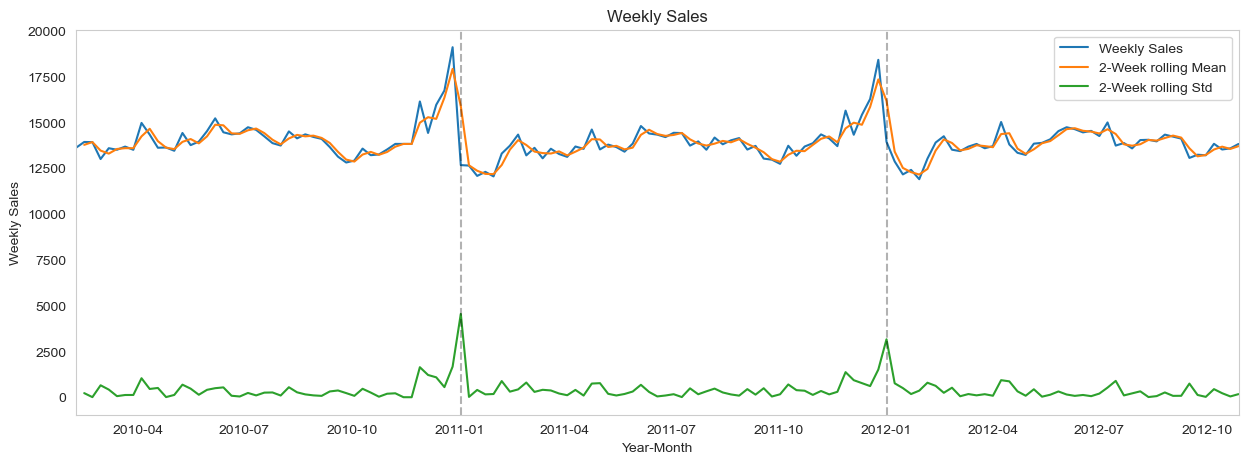

In [61]:
plt.figure(figsize = (15, 5))

plt.plot(df['Weekly_Sales'], label = 'Weekly Sales')

plt.plot(df['Weekly_Sales'].rolling(window = 2, center = False).mean(), label = '2-Week rolling Mean')

plt.plot(df['Weekly_Sales'].rolling(window = 2, center = False).std(), label = '2-Week rolling Std')

plt.axvline(x = df[df['Year'] == 2010].index[-1], color = 'black', linestyle = '--', alpha = 0.3)

plt.axvline(x = df[df['Year'] == 2011].index[-1], color = 'black', linestyle = '--', alpha = 0.3)

plt.grid(False)
plt.ylabel('Weekly Sales')
plt.xlabel('Year-Month')
plt.xlim(df[df['Year'] == 2010].index[0], df[df['Year'] == 2012].index[-1])
plt.legend()
plt.title('Weekly Sales')
plt.show()

We can see that our data is not stationary.

### Augmented Dickey-Fuller Test

In [62]:
result = adfuller(df['Weekly_Sales'])

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {round(result[1], 4)}')
print('Critical Values:')

for key, value in result[4].items():

    print(f'\t{key}: {value}')

ADF Statistic: -4.919505880533281
p-value: 0.0
Critical Values:
	1%: -3.480500383888377
	5%: -2.8835279559405045
	10%: -2.578495716547007


The ADF test statics is lesser (more negative) then the critical value, this indicates that the data is stationary.

### Kwiatkowski Phillips Schmidt Shin Test

In [63]:
result = kpss(df['Weekly_Sales'], regression = "ct")

print(f'Test Statistic: {result[0]}' )
print(f'p-value: {result[1]}')
print('Critical values:')

for key, value in result[3].items():

     print(f'\t{key}: {value}')

Test Statistic: 0.025338514113601492
p-value: 0.1
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


The KPPS test statics is less than the critical values, this indicates that the data is stationary.

Likewise, the data will be adjusted until the ADF is satisfactory.

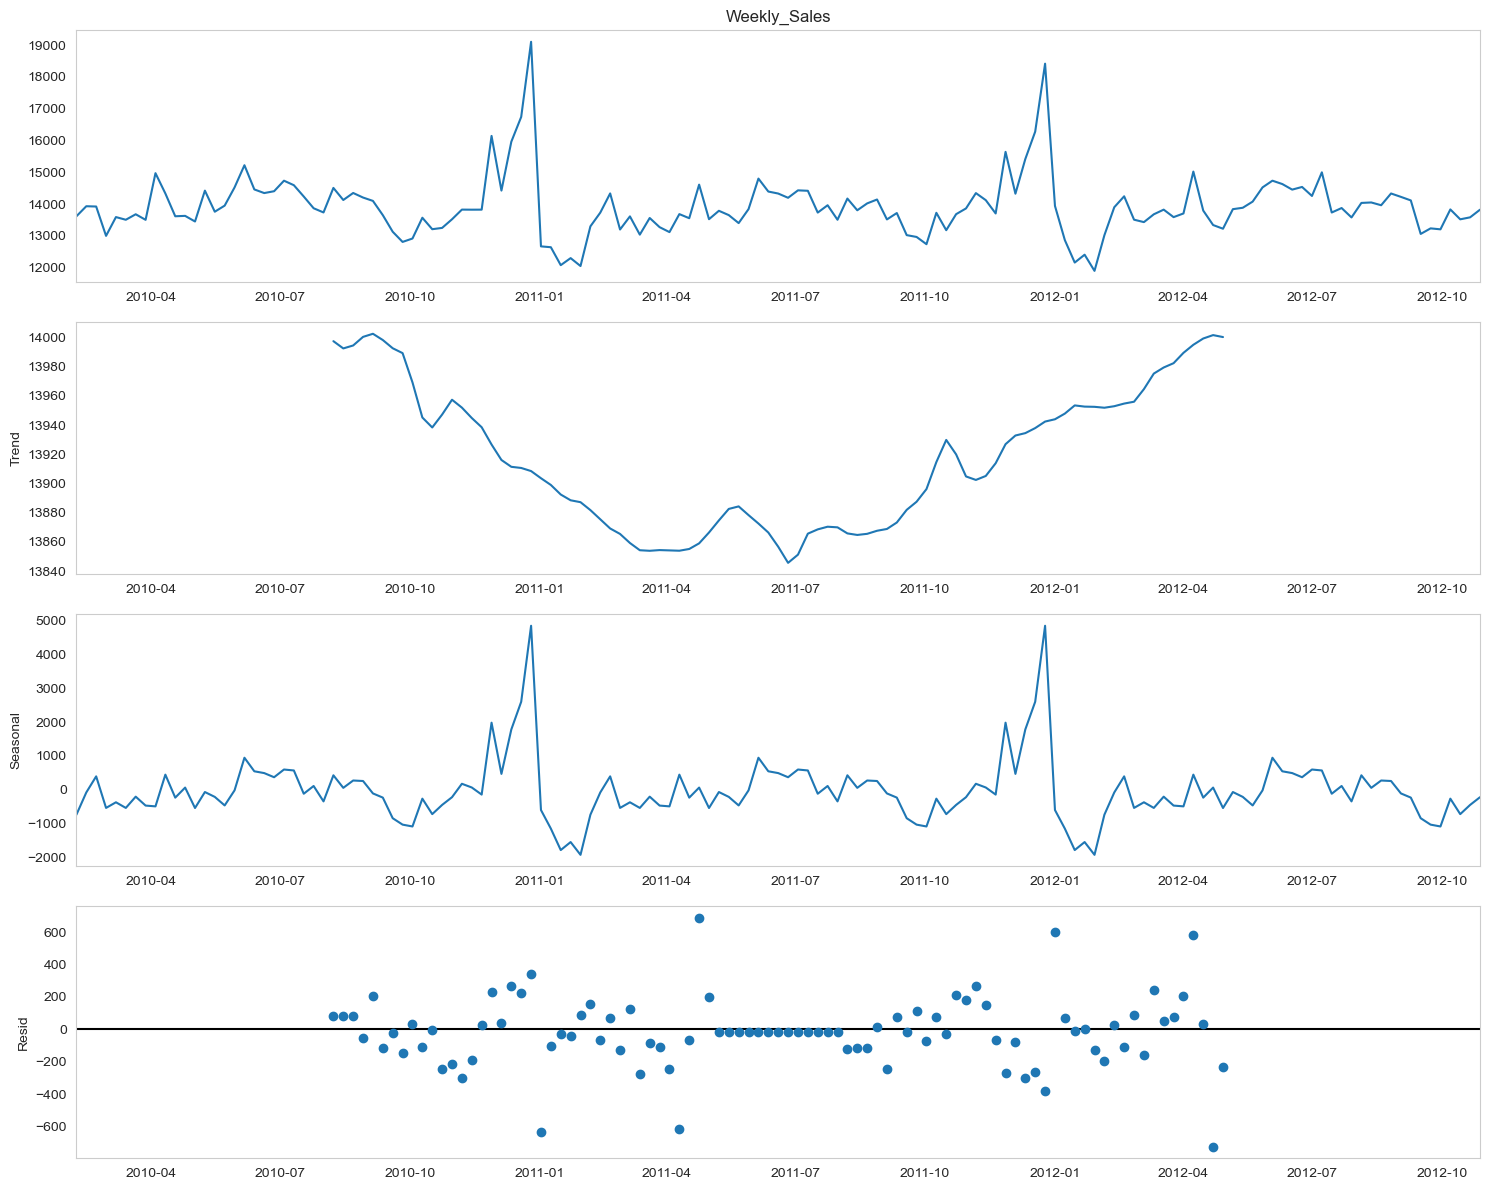

In [64]:
rcParams['figure.figsize'] = 15, 12

rcParams['axes.grid'] = False

decomposition = sm.tsa.seasonal_decompose(df['Weekly_Sales'], model='additive')

fig = decomposition.plot()

In order to modify our data and made stationary I could apply different methods:

- First differencing
- Second differencing
- Data Shift
- Data Natural Log
- Data Square Root
- Data Cube Root
- Proportional change

The most common one is differencing. I'll start from there and then run all the test until I got stationary data.

### Non-stationary Data First Differencing

In [65]:
FirstDiff = df['Weekly_Sales'].diff().dropna()

### First Differencing Rolling Statistics

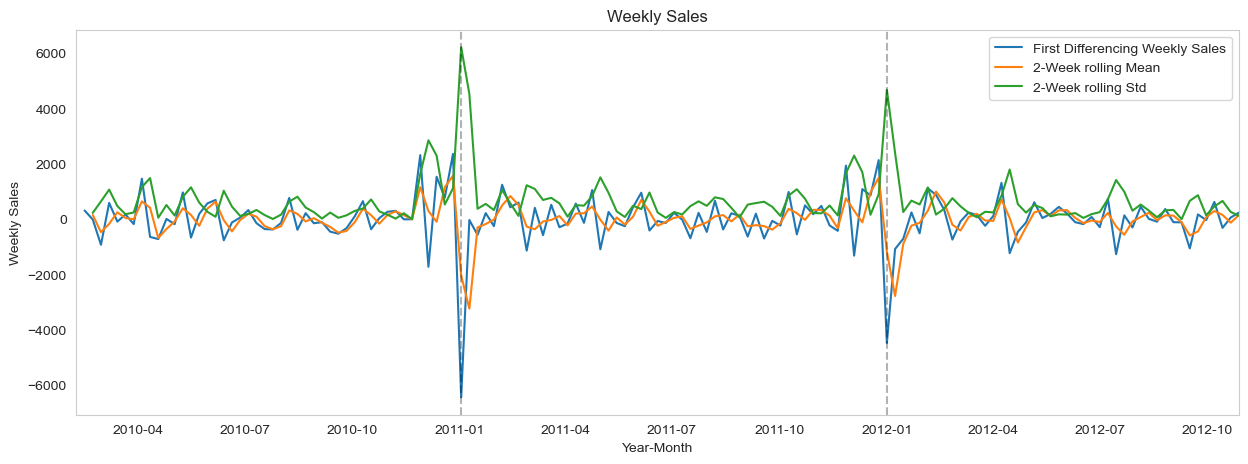

In [66]:
plt.figure(figsize = (15, 5))

plt.plot(FirstDiff, label = 'First Differencing Weekly Sales')

plt.plot(FirstDiff.rolling(window = 2, center = False).mean(), label = '2-Week rolling Mean')

plt.plot(FirstDiff.rolling(window = 2, center = False).std(), label = '2-Week rolling Std')

plt.axvline(x = df[df['Year'] == 2010].index[-1], color = 'black', linestyle = '--', alpha = 0.3)

plt.axvline(x = df[df['Year'] == 2011].index[-1], color = 'black', linestyle = '--', alpha = 0.3)


plt.grid(False)
plt.ylabel('Weekly Sales')
plt.xlabel('Year-Month')
plt.xlim(df[df['Year'] == 2010].index[0], df[df['Year'] == 2012].index[-1])
plt.legend()
plt.title('Weekly Sales')
plt.show()

### First Differencing Augmented Dickey-Fuller Test

In [67]:
result = adfuller(FirstDiff)

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {round(result[1], 4)}')
print('Critical Values:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -8.445535686657788
p-value: 0.0
Critical Values:
	1%: -3.4793722137854926
	5%: -2.8830370378332995
	10%: -2.578233635380623


### Non-stationary Data shift

In [68]:
DataShift = df['Weekly_Sales'].shift().dropna()

### Shift Rolling Statistics

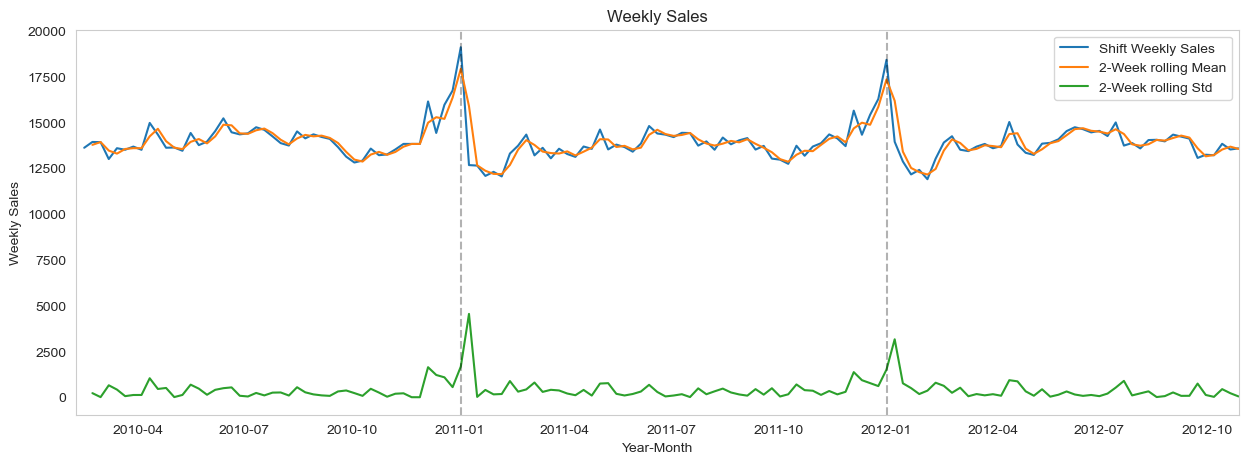

In [69]:
plt.figure(figsize = (15, 5))

plt.plot(DataShift, label = 'Shift Weekly Sales')

plt.plot(DataShift.rolling(window = 2, center = False).mean(), label = '2-Week rolling Mean')

plt.plot(DataShift.rolling(window = 2, center = False).std(), label = '2-Week rolling Std')

plt.axvline(x = df[df['Year'] == 2010].index[-1], color = 'black', linestyle = '--', alpha = 0.3)

plt.axvline(x = df[df['Year'] == 2011].index[-1], color = 'black', linestyle = '--', alpha = 0.3)


plt.grid(False)
plt.ylabel('Weekly Sales')
plt.xlabel('Year-Month')
plt.xlim(df[df['Year'] == 2010].index[0], df[df['Year'] == 2012].index[-1])
plt.legend()
plt.title('Weekly Sales')
plt.show()

### Shift Augmented Dickey-Fuller Test

In [70]:
result = adfuller(DataShift)

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {round(result[1], 4)}')
print('Critical Values:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -4.89311514780672
p-value: 0.0
Critical Values:
	1%: -3.4808880719210005
	5%: -2.8836966192225284
	10%: -2.5785857598714417


### Non-stationary Data natural log

In [71]:
DataLog = np.log(df['Weekly_Sales']).dropna()

### Natural log Rolling Statistics

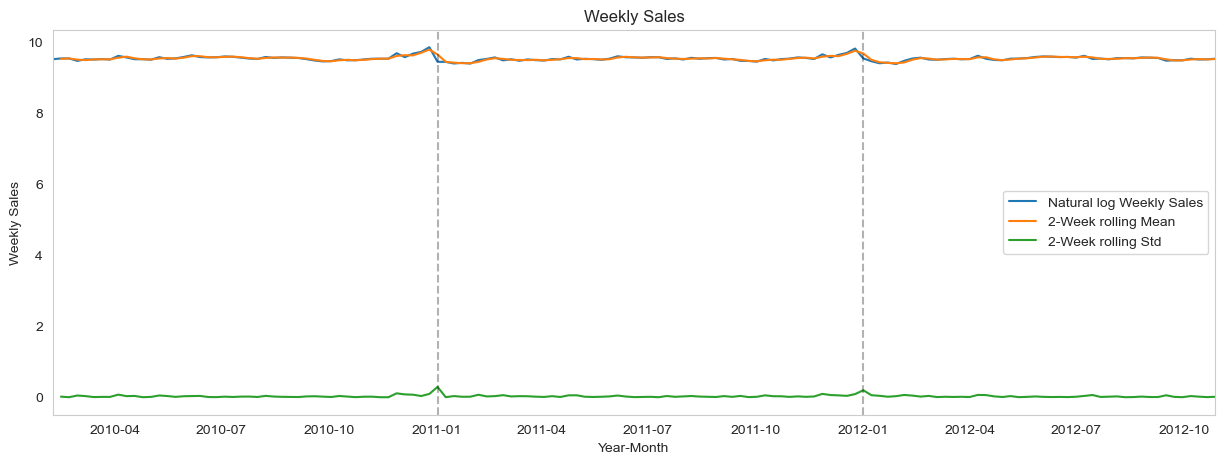

In [72]:
plt.figure(figsize = (15, 5))

plt.plot(DataLog, label = 'Natural log Weekly Sales')

plt.plot(DataLog.rolling(window = 2, center = False).mean(), label = '2-Week rolling Mean')

plt.plot(DataLog.rolling(window = 2, center = False).std(), label = '2-Week rolling Std')

plt.axvline(x = df[df['Year'] == 2010].index[-1], color = 'black', linestyle = '--', alpha = 0.3)

plt.axvline(x = df[df['Year'] == 2011].index[-1], color = 'black', linestyle = '--', alpha = 0.3)


plt.grid(False)
plt.ylabel('Weekly Sales')
plt.xlabel('Year-Month')
plt.xlim(df[df['Year'] == 2010].index[0], df[df['Year'] == 2012].index[-1])
plt.legend()
plt.title('Weekly Sales')
plt.show()

### Natural log Augmented Dickey-Fuller Test

In [73]:
result = adfuller(DataLog)

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {round(result[1], 4)}')
print('Critical Values:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -4.953897894467876
p-value: 0.0
Critical Values:
	1%: -3.480500383888377
	5%: -2.8835279559405045
	10%: -2.578495716547007


### Non-stationary Data natural log1p

In [74]:
DataLog1p = np.log1p(df['Weekly_Sales']).dropna()

### Natural log1p Rolling Statistics

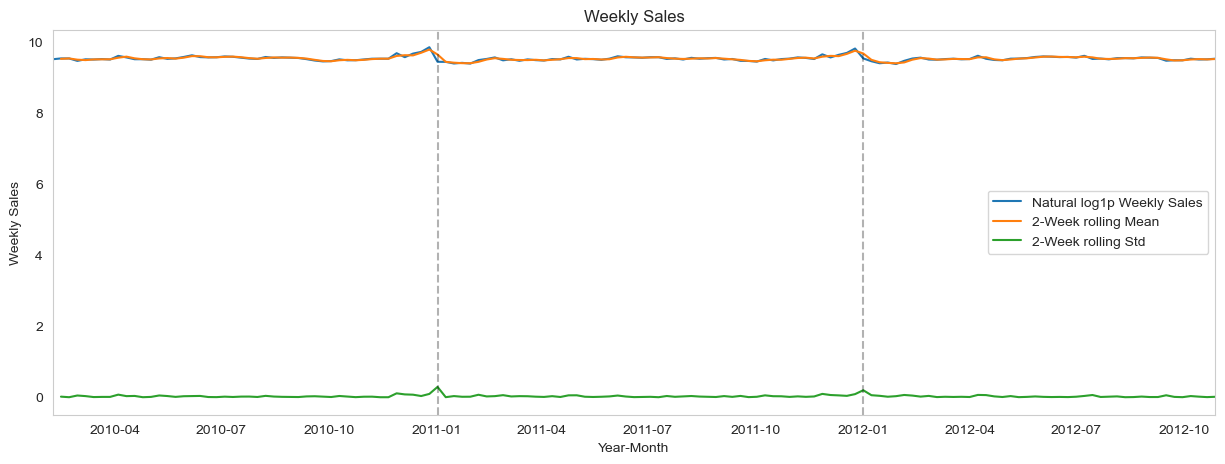

In [75]:
plt.figure(figsize = (15, 5))

plt.plot(DataLog1p, label = 'Natural log1p Weekly Sales')

plt.plot(DataLog1p.rolling(window = 2, center = False).mean(), label = '2-Week rolling Mean')

plt.plot(DataLog1p.rolling(window = 2, center = False).std(), label = '2-Week rolling Std')

plt.axvline(x = df[df['Year'] == 2010].index[-1], color = 'black', linestyle = '--', alpha = 0.3)

plt.axvline(x = df[df['Year'] == 2011].index[-1], color = 'black', linestyle = '--', alpha = 0.3)


plt.grid(False)
plt.ylabel('Weekly Sales')
plt.xlabel('Year-Month')
plt.xlim(df[df['Year'] == 2010].index[0], df[df['Year'] == 2012].index[-1])
plt.legend()
plt.title('Weekly Sales')
plt.show()

### Natural log1p Augmented Dickey-Fuller Test

In [76]:
result = adfuller(DataLog1p)

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -4.9538969429592346
p-value: 2.7360147513436883e-05
Critical Values:
	1%: -3.480500383888377
	5%: -2.8835279559405045
	10%: -2.578495716547007


### Non-stationary Data Second Differencing

In [77]:
SecondDiff = FirstDiff.diff().dropna()

### Second Differencing Rolling Statistics

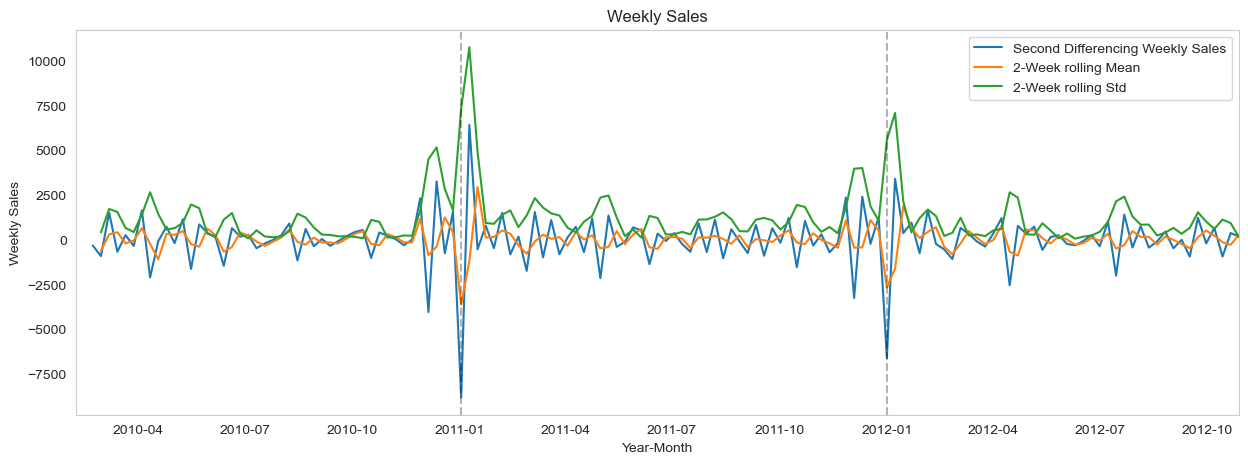

In [78]:
plt.figure(figsize = (15, 5))

plt.plot(SecondDiff, label = 'Second Differencing Weekly Sales')

plt.plot(SecondDiff.rolling(window = 2, center = False).mean(), label = '2-Week rolling Mean')

plt.plot(SecondDiff.rolling(window = 2, center = False).std(), label = '2-Week rolling Std')

plt.axvline(x = df[df['Year'] == 2010].index[-1], color = 'black', linestyle = '--', alpha = 0.3)

plt.axvline(x = df[df['Year'] == 2011].index[-1], color = 'black', linestyle = '--', alpha = 0.3)


plt.grid(False)
plt.ylabel('Weekly Sales')
plt.xlabel('Year-Month')
plt.xlim(df[df['Year'] == 2010].index[0], df[df['Year'] == 2012].index[-1])
plt.legend()
plt.title('Weekly Sales')
plt.show()

### Second Differencing Augmented Dickey-Fuller Test

In [79]:
result = adfuller(SecondDiff)

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {round(result[1],5)}')
print('Critical Values:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -8.631790942373769
p-value: 0.0
Critical Values:
	1%: -3.480500383888377
	5%: -2.8835279559405045
	10%: -2.578495716547007


Since I am not noticing any changes with the transformation I will stop and give some transformations a chance to perform in the model. I'll be trainning the transformations I tested so far:

Normal data (Without Modifications)
First Differencing
Data Shift
Data Natural Log
I will perform a Random Forest Model on the normal data and the time series models in the rest of transformations, since the normal data is not stationary theres no reason to perform a time series model on it. The purpose of doing this is to see which one performs better with the current settings.

## Train Test Split

In [80]:
X = df.drop('Weekly_Sales', axis = 1)
y = df['Weekly_Sales']

#Scaling the data before fitting it to the model it's always a good habit to have.
scaler = RobustScaler().fit(X)

X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle = False)

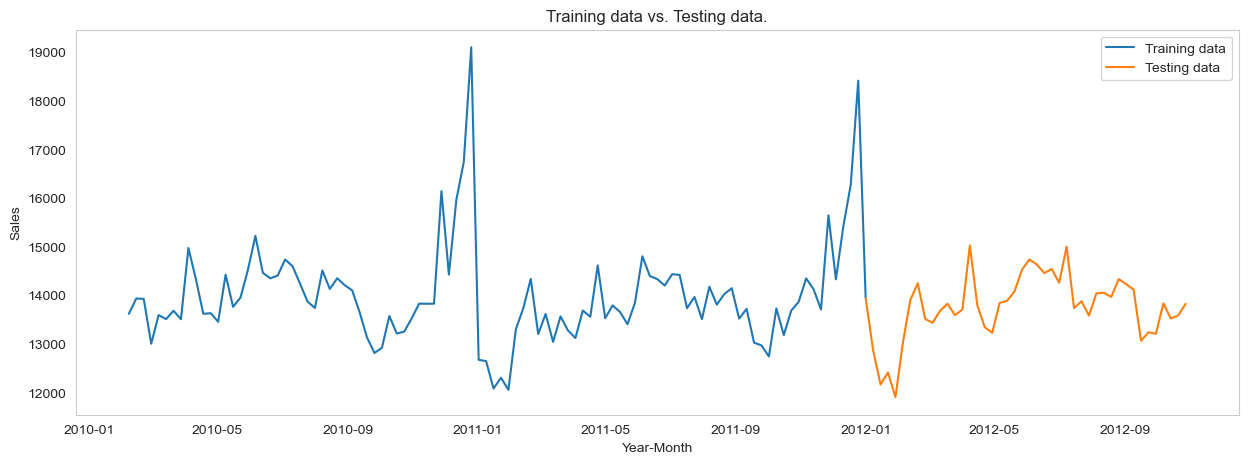

In [81]:
plt.figure(figsize = (15, 5))

plt.plot(df['Weekly_Sales'][:len(df['Weekly_Sales']) - len(X_test)], label = 'Training data')
plt.plot(df['Weekly_Sales'][len(df['Weekly_Sales']) - (len(X_test) + 1):], label = 'Testing data')

plt.xlabel('Year-Month')
plt.legend()
plt.ylabel('Sales')
plt.title('Training data vs. Testing data.')
plt.show()

## Training the model

### Random Forest Regressor

In [82]:
RandomForestRegressorND = RandomForestRegressor(n_estimators = 100, max_depth = 30, n_jobs = -1,
                                              random_state = 40).fit(X_train, y_train)

RandomForestRegressorND.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, n_jobs=-1, random_state=40)

In [83]:
RandomForestPredictionsND = RandomForestRegressorND.predict(X_test)

print(f"Model Score:{RandomForestRegressorND.score(X_train, y_train)}")
print(f"MAE: {metrics.mean_absolute_error(y_test, RandomForestPredictionsND)}")
print(f"MSE: {metrics.mean_squared_error(y_test, RandomForestPredictionsND)}")
print(f"RMSE: {np.sqrt(metrics.mean_absolute_error(y_test, RandomForestPredictionsND))}")

Model Score:0.9407748200479514
MAE: 452.595010182813
MSE: 336192.3007790558
RMSE: 21.27428048566656


### Model performance

In [84]:
RandomForestSummaryND = pd.DataFrame()

RandomForestSummaryND['Model Prediction'] = RandomForestPredictionsND

RandomForestSummaryND['Actual Value'] = y_test.reset_index()['Weekly_Sales']

RandomForestSummaryND['Difference'] = RandomForestSummaryND['Model Prediction'] - RandomForestSummaryND['Actual Value']

RandomForestSummaryND['Difference %'] = round(np.absolute(RandomForestSummaryND['Difference'] / RandomForestSummaryND['Actual Value'] * 100), 2)

RandomForestSummaryND.sort_values(by = 'Difference %')

,Model Prediction,Actual Value,Difference,Difference %
0,12872.281650,12868.107358,4.174292,0.03
32,13977.966233,13964.657943,13.308289,0.10
26,15016.189401,14999.542681,16.646719,0.11
25,14293.615547,14256.616932,36.998615,0.26
6,14298.238182,14245.834969,52.403213,0.37
10,13877.789930,13826.309188,51.480742,0.37
18,13955.705162,13885.275812,70.429350,0.51
39,13737.739898,13832.804041,-95.064142,0.69
14,13900.196490,13796.965723,103.230768,0.75
31,13935.892014,14052.098069,-116.206055,0.83


In [85]:
RandomForestSummaryND.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Model Prediction,43.0,14058.944297,539.322508,12872.281650,13876.946147,13955.705162,14378.297997,15029.439632
Actual Value,43.0,13762.625478,674.105064,11901.021570,13472.209274,13826.309188,14171.891966,15023.188036
Difference,43.0,296.318819,504.283101,-1092.248576,14.977504,266.500573,561.696242,1264.241334
Difference %,43.0,3.338372,2.749318,0.030000,0.895000,2.860000,4.730000,9.710000


### Predictions vs. Testing Dataset

In [86]:
RandomForestPlotND = y_test.reset_index()

RandomForestPlotND['Predictions'] = RandomForestPredictionsND

RandomForestPlotND.set_index(RandomForestPlotND['Date'], inplace = True, drop = True)

RandomForestPlotND.drop(['Date', 'Weekly_Sales'], inplace = True, axis = 1)

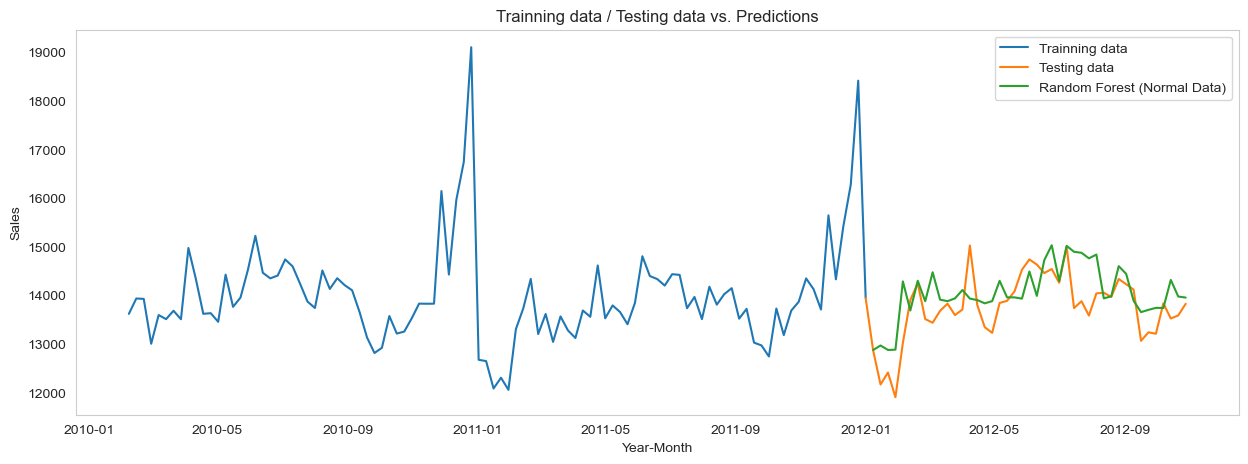

In [87]:
plt.figure(figsize = (15, 5))

plt.plot(df['Weekly_Sales'][:len(df['Weekly_Sales']) - len(X_test)], label = 'Trainning data')
plt.plot(df['Weekly_Sales'][len(df['Weekly_Sales']) - (len(X_test) + 1):], label = 'Testing data')
plt.plot(RandomForestPlotND, label = 'Random Forest (Normal Data)')

plt.xlabel('Year-Month')
plt.legend()
plt.ylabel('Sales')
plt.title('Trainning data / Testing data vs. Predictions')
plt.show()

### Predictors importance

In [88]:
RFImportanceND = pd.DataFrame(index = df.drop('Weekly_Sales', axis = 1).columns.values)

RFImportanceND['Importance'] = RandomForestRegressorND.feature_importances_

RFImportanceND.sort_values(by = 'Importance', ascending = False)

,Importance
Week,0.340362
Dept,0.240524
TypeB,0.113451
Temperature,0.093462
TypeC,0.065910
Month,0.049226
Fuel_Price,0.031095
Thanksgiving,0.024946
MarkDown1,0.014856
MarkDown3,0.013413


### Comparation table

In [89]:
Model, Data_Type, MAE, MSE, RMSE, Max_Diff, Mean_Diff, Min_Diff = list(), list(), list(), list(), list(), list(), list(), list()

Model.append('Random Forest')
Data_Type.append('Normal Data')
MAE.append(metrics.mean_absolute_error(y_test, RandomForestPredictionsND))
MSE.append(metrics.mean_squared_error(y_test, RandomForestPredictionsND))
RMSE.append(np.sqrt(metrics.mean_absolute_error(y_test, RandomForestPredictionsND)))
Min_Diff.append(0.030000)
Mean_Diff.append(3.338372)
Max_Diff.append(9.710000)

## Autoregressive Integrated Moving Average (ARIMA) (First Differencing)